# Mechanical Networks

We derive the equations of mechanical equilibrium by developing and applying
the matrix forms of Hooke's Law and Conservation of Force. We solve these
equations, by hand, via Gaussian Elimination. This concrete elementary
scheme reveals the importance of pivots and leads us to the Gauss-Jordan
method of matrix inversion, the LU method of matrix factorization, and to 
the important notion of matrix determinant. 

In the final section we demonstrate
that force balance is equivalent to the minimization of potential energy.

Throughout the chapter we illustrate each of these
ideas on linear and planar mechanical networks. We make the leap into three-dimensional networks in the exercises.


## Longitudinal Motion and the Strang Quartet

We imagine a sequence of elastic links, attached to a wall, and subject to horizontal forces at its nodes.

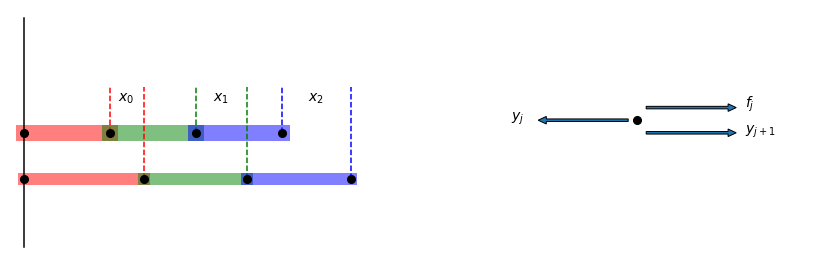

In [83]:
# draw 3 horizontal links, before and after stretching, together with a force diagram
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np  

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

colors = ['r', 'g', 'b']

for i in range(3):
    ax1.plot([i, i+1], [0, 0], colors[i], linewidth=16, alpha = 0.5) 
    ax1.plot(i, 0, 'ko', markersize=8)
    ax1.plot([i+1,i+1], [0, 0.1], colors[i]+'--')
    
ax1.plot(3, 0, 'ko', markersize=8)

x = np.array([0, 0.4, 0.6, 0.8])

for i in range(3):
    ax1.plot([i+x[i], i+1+x[i+1]], [-0.1, -0.1], colors[i], linewidth=12, alpha = 0.5)
    ax1.plot(i+x[i], -.1, 'ko', markersize=8)
    ax1.plot([i+1+x[i+1],i+1+x[i+1]], [-.1,.1], colors[i]+'--')
    lab = '$x_' + str(i) + '$'
    ax1.text(i+0.9+x[i+1]/2,0.07, lab, fontsize=14)
    
ax1.plot(3+x[3], -0.1, 'ko', markersize=8)
ax1.axis('off')
ax1.plot([0, 0], [-.25,.25], 'k')

# force diagram on ax2

ax2.arrow(0.1,0,1,0,width=0.02,length_includes_head=True)
ax2.text(1.2,0.2,'$f_j$', fontsize=14)
ax2.plot(0,0.1, 'ko', markersize=8)
ax2.arrow(0.1,.2,1,0,width=0.02,length_includes_head=True)
ax2.text(1.2,0,'$y_{j+1}$', fontsize=14)
ax2.arrow(-0.1,.1,-1,0,width=0.02,length_includes_head=True)
ax2.text(-1.4,0.1,'$y_j$', fontsize=14)
ax2.set_xlim([-2,2])
ax2.set_ylim([-1,1])
ax2.axis('off');

\begin{myfig}\label{fig:Lfiber} **Left:** Three elastic links, before (top) and after (bottom) stretching due to horizontal force applied at the three nodes (black circles). The displacement of node $j$ is denoted $x_j$. **Right:** The forces at node $j$ are the applied force, $f_j$, and the counter restoring forces $y_j$ and $y_{j+1}$ in the adjacent links. \end{myfig}

We now build a system of equations for the three displacements, $x_0,\,x_1,\,x_2$
in terms of the known physical properties of the elastic links.
The analog of potential difference is here
**elongation**. If $e_j$ denotes the elongation of the $j$th link then, with regard
to Figure \ref{fig:Lfiber}, we find that

\begin{equation*}
  e_0 = x_0, \hskip 0.25in e_1 = x_1-x_0, \and e_2 = x_2-x_1, \nonumber
\end{equation*}

or, in matrix terms,

\begin{equation*}
  e = Ax \where
  A = \begin{pmatrix}1 & 0 & 0 \cr -1 & 1 & 0 \cr 0 & -1 & 1  \end{pmatrix} \nonumber
\end{equation*}

where $A$ is the associated node-edge incidence matrix.
We note that $e_j$ is positive when the link is stretched and negative
when compressed. 

The analog of Ohm's Law is here  

**Hooke's Law:** the restoring force in an elastic link is proportional to its elongation. 

The constant of proportionality
is called the **stiffness** of the link. We denote the stiffness of the $j$th link by
$k_j$. In our case we presume that each has cross-sectional area $a$ (units of $m^2$), length $\ell$ (units of $m$), and Young's modulus $Y$ (units of $N/m^2$). The stiffness of each link is then 

\begin{equation*}
  k_0 =  k_1 = k_2 = Ya/\ell, \nonumber
\end{equation*}

If we denote the restoring force 
by $y_j$, Hooke's Law then reads $y_j=k_je_j$, or, in matrix terms

\begin{equation*}
  y = Ke \where K = \begin{pmatrix}k_1 & 0 & 0 \cr
                             0 & k_2 & 0 \cr
                             0 & 0 & k_3  \end{pmatrix}. \nonumber
\end{equation*}

As  each $k_j>0$ we see that restoring forces echo the
sign convention for elongations. 
Namely, $y_j$ is positive when link $j$ is
**stretched**, and negative when it is **compressed**. A positive restoring force
will then "pull" on its ends and we arrive at the free body diagram in Figure \ref{fig:Lfiber}.

This free body diagram allows us to balance the link (restoring) forces, $y_j$, with the applied forces, $f_j$, at each node;

\begin{equation*}
  y_0 = f_0 + y_1, \hskip 0.25in y_1 = f_1 + y_2, \and y_2=f_2, \nonumber
\end{equation*}

or, in matrix terms

\begin{equation*} \label{eq:jnk9}
  By = f \where f = \begin{pmatrix}f_0 \cr f_1 \cr f_2\end{pmatrix} \and
      B = \begin{pmatrix}1 & -1 & 0 \cr
                   0 &  1 & -1 \cr
                   0 & 0 & 1 \end{pmatrix}.
\end{equation*}

As is the previous chapter we recognize in $B$ the transpose of $A$. Gathering
our three important steps

\begin{equation}
  \eqalign{e &= Ax \cr y &= Ke \cr A^Ty &= f \cr} \label{eq:strq1}
\end{equation}

we arrive, via direct substitution, at an equation for $x$. Namely

\begin{equation}
  A^Ty=f \Rightarrow A^TKe = f \Rightarrow \boxed{A^TKAx = f.} \label{eq:strq2}
\end{equation}

These four steps, (\ref{eq:strq1})-(\ref{eq:strq2}), comprise the **Strang Quartet** for mechanical networks.
Assembling $A^TKA$ we arrive at the final system

\begin{equation}
  \begin{pmatrix}k_0+k_1 & -k_1 & 0 \cr
           -k_1 & k_1+k_2 & -k_2 \cr
            0 & -k_2 & k_2 \end{pmatrix}
  \begin{pmatrix}x_0 \cr x_1 \cr x_2\end{pmatrix} =
  \begin{pmatrix}f_0 \cr f_1 \cr f_2\end{pmatrix} \label{eq:g3}
\end{equation}

As with our discrete neuron, this system is easily built, solved, and graphed in python.

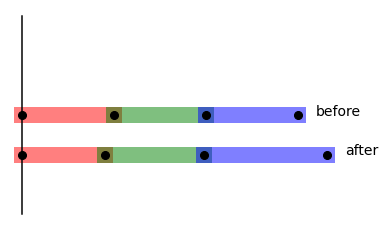

In [15]:
#  The Longitudinal link net
%matplotlib inline
import numpy as np                 # import math functions
import matplotlib.pyplot as plt    # import plot functions

ell = 1	# link length (m)
a = 0.025	# link cross sectional area (m^2)
Y = 2e3 # Young's Modulus (N/m^2)
k = Y*a/ell  # link stiffness

N = 3    # number of links
    
A = np.eye(N)	# initialize incidence matrix
    
for j in range(1,N):  # build off-diagonal one row at a time
    A[j,j-1] = -1      
    
K = k*np.eye(N)
    
S = A.T @ K @ A 	# assemble main matrix
    
f = 10*np.random.randn(N,1)	# random forces
    
x = np.linalg.solve(S,f)	# solve for displacments

x = np.append(0,x)   # pre-pend 0 for plotting purposes

colors = ['r', 'g', 'b']

for i in range(3):    # plot undeformed
    plt.plot([i, i+1], [0, 0], colors[i], linewidth=16, alpha = 0.5) 
    plt.plot(i, 0, 'ko', markersize=8)
    
plt.plot(3, 0, 'ko', markersize=8)
plt.text(3.2, 0, 'before', fontsize=14)

for i in range(3):    # plot deformed
    plt.plot([i+x[i], i+1+x[i+1]], [-0.1, -0.1], colors[i], linewidth=16, alpha = 0.5)
    plt.plot(i+x[i], -.1, 'ko', markersize=8)
    
plt.plot(3+x[3], -0.1, 'ko', markersize=8)
plt.text(3.2+x[3], -0.1, 'after', fontsize=14)
plt.axis('off')
plt.plot([0, 0], [-.25,.25], 'k');

\begin{myfig}\label{fig:Lsolved} The longitudinal displacement of three elastic links under a set of three random horizontal forces. \end{myfig}

\begin{exercise}\label{ex:virtualwoark} Deduce from $e=Ax$ and $A^Ty=f$ that the work
done by the load is precisely the work done by the links. That is, show
that

\begin{equation*}
  x^Tf = y^Te.  \nonumber
\end{equation*}

\end{exercise}

\begin{exercise}\label{ex:atgaexp}  In order to refresh your matrix-vector multiply 
skills please
calculate, by hand, the product $A^TGA$ in the 3 compartment case and
write out the 3 equations in (\ref{eq:g3}) in the case that $k_0=k_1=k_2\equiv k$. The second equation should
read

\begin{equation}
  k(-x_0+2x_1-x_2) = f_1. \label{eq:compeqfib}
\end{equation}

\end{exercise}

## Gaussian Elimination and LU Decomposition

We next look under the hood to reveal how linear systems of equations are actually solved.
This will deliver several benefits.

In Gaussian Elimination one first uses linear combinations of preceding 
rows to eliminate nonzeros below the main diagonal and then solves the
resulting upper triangular system via back substitution. To firm up our
understanding let us take up the case where each $k_j=1$ and so (\ref{eq:g3})
takes the form $Sx=f$, i.e.,

\begin{equation}
  \left(\begin{matrix}2 & -1 & 0 \cr
                     -1 & 2 & -1 \cr 
                      0 & -1 & 1 \end{matrix}\right)
  \left(\begin{matrix}x_0\cr x_1\cr x_2\end{matrix}\right) =
  \left(\begin{matrix}f_0\cr f_1\cr f_2\end{matrix}\right) \label{eq:Kxb}
\end{equation}

We eliminate the $(1,0)$ (row 1, column 0) element by implementing

\begin{equation}
  \hbox{new row 1} = \hbox{old row 1}+\frac{1}{2}\hbox{row 0},
     \label{eq:elop1}
\end{equation}

bringing

\begin{equation*}
  \left(\begin{matrix}2 & -1 & 0 \cr 0 & 3/2 & -1 \cr 0 & -1 & 1 \end{matrix}\right)
  \left(\begin{matrix}x_0\cr x_1\cr x_2\end{matrix}\right) =
  \left(\begin{matrix}f_0\cr f_1+f_0/2\cr f_2\end{matrix}\right) \nonumber
\end{equation*}

We eliminate the current $(2,1)$ element by implementing

\begin{equation}
  \hbox{new row 2} = \hbox{old row 2}+\frac{2}{3}\hbox{row 1},
     \label{eq:elop2}
\end{equation}

bringing the upper-triangular system 

\begin{equation}
 Ux = g, \label{eq:fU}
\end{equation}

or, more precisely,

\begin{equation}
  \begin{pmatrix}2 & -1 & 0 \cr 0 & 3/2 & -1 \cr 0 & 0 & 1/3 \end{pmatrix}
  \begin{pmatrix}x_0\cr x_1\cr x_2\end{pmatrix} =
  \begin{pmatrix}f_0\cr f_1+f_0/2\cr f_2+2f_1/3+f_0/3\end{pmatrix} \label{eq:Uxg}
\end{equation}

One now simply reads off, starting at the bottom row in (\ref{eq:Uxg}) that

\begin{equation}
  x_2 = f_0 + 2f_1 + 3f_2. \label{eq:x3fib1}
\end{equation}

Moving back through the rows, the next equation reads

\begin{equation*}
  (3/2)x_1 - x_2 = f_1+f_0/2
\end{equation*}

which, in light of (\ref{eq:x3fib1}) reveals

\begin{equation}
  x_1 = (2/3)x_2 + (2/3)f_1 + (1/3)f_0 = f_0 + 2f_1 + 2f_2 \label{eq:x2fib1}
\end{equation}

proceeding now to the top row in (\ref{eq:Uxg}) we find

\begin{equation*}
  2x_0 - x_1 = f_0 
\end{equation*}

which, in light of (\ref{eq:x2fib1}) reveals

\begin{equation}
  x_0 = x_1/2 + f_0/2 =  f_0 + f_1 + f_2\label{eq:x1fib1}
\end{equation}

One must say that Gaussian Elimination has succeeded here. For, regardless
of the actual elements of $f$ we have produced an $x$ for which $A^TKAx=f$.
On collecting (\ref{eq:x3fib1})-(\ref{eq:x1fib1}) in matrix vector form we discover
the beautifully symmetric form

\begin{equation}
  \begin{pmatrix} x_0 \\ x_1 \\ x_2 \end{pmatrix} =
  \begin{pmatrix} 1 & 1 & 1 \\ 1 & 2 & 2 \\ 1 & 2 & 3 \end{pmatrix}
  \begin{pmatrix} f_0 \\ f_1 \\ f_2 \end{pmatrix},  \label{eq:xfib1}
\end{equation}

or $x=Zf$ for short. If we contrast this with our starting point, (\ref{eq:Kxb}),
or $Sx=f$ for short we find $f=Sx=SZf$. As this holds for every $f$ it follows
that $SZ$ can only be the identity matrix, $I$. We can indeed confirm that

\begin{equation*}
 \begin{pmatrix} 2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 1 \end{pmatrix} 
 \begin{pmatrix} 1 & 1 & 1 \\ 1 & 2 & 2 \\ 1 & 2 & 3 \end{pmatrix} 
 = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix},  \nonumber
\end{equation*}

that is, $SZ=I$.
Now whenever the product of two square matrices is the identity matrix then
these two matrices are the inverses of one another. To make this
explicit we use the notation $Z=S^{-1}$ and call it the  **inverse** of $S$.
Our  *discovery* of $S^{-1}$ in \ref{eq:xfib1}  was aided by our solution of
$Sx=f$ for general, variable, $f$. 

There is a systematic alternative to our
process that works by simultaneously applying Gaussian Elimination to several 
"representative" $f$ vectors. More precisely, the  **Gauss-Jordan method**
computes the inverse of $S$ by augmenting it with the identity matrix, e.g.,

\begin{equation*}
  \begin{pmatrix}2 & -1 & 0 & | & 1 & 0 & 0 \cr
          -1 & 2 & -1 & | & 0 & 1 & 0 \cr 
           0 & -1 & 1 & | & 0 & 0 & 1 \end{pmatrix} \nonumber
\end{equation*}

and then applying elementary row operations until $S$ has been transformed to
$I$. In the process, the augmented $I$ will be transformed into to the desired 
$S^{-1}$. This is easier done than said.

We first eliminate down, as in normal Gaussian Elimination, being careful 
to address each of the 3 $f$ vectors. This produces

\begin{equation*}
  \begin{pmatrix}2 & -1 & 0 & | & 1 & 0 & 0 \cr
           0 & 3/2 & -1 & | & 1/2 & 1 & 0 \cr 
           0 & 0 & 1/3 & | & 1/3 & 2/3 & 1 \end{pmatrix}. \nonumber
\end{equation*}

Now, rather than simple back substitution we instead eliminate up.
Eliminating first the $(1,2)$ element we find

\begin{equation*}
  \begin{pmatrix}2 & -1 & 0 & | & 1 & 0 & 0 \cr
           0 & 3/2 & 0 & | & 3/2 & 3 & 3 \cr 
           0 & 0 & 1/3 & | & 1/3 & 2/3 & 1 \end{pmatrix} \nonumber
\end{equation*}

Now eliminating the $(0,1)$ element we achieve

\begin{equation*}
  \begin{pmatrix}2 & 0 & 0 & | & 2 & 2 & 2 \cr
           0 & 3/2 & 0 & | & 3/2 & 3 & 3 \cr 
           0 & 0 & 1/3 & | & 1/3 & 2/3 & 1 \end{pmatrix} \nonumber
\end{equation*}

In the final step we scale each row in order that the matrix on the left
takes on the form of the identity. This requires that we multiply row 0 by 1/2,
row 1 by 2/3 and row 2 by 3, with the result

\begin{equation*}
  \begin{pmatrix}1 & 0 & 0 & | & 1 & 1 & 1 \cr
           0 & 1 & 0 & | & 1 & 2 & 2 \cr 
           0 & 0 & 1 & | & 1 & 2 & 3 \end{pmatrix}. \nonumber
\end{equation*}

Now in this transformation of $S$ into $I$ we have,  *ipso facto* , 
transformed
$I$ to $S^{-1}$, i.e., the matrix that appears on the right upon applying the
method of Gauss-Jordan is the inverse of the matrix that began on the left.

Some matrices can be inverted by inspection. 
An important class of such matrices is in fact latent in the process
of Gaussian Elimination itself.
To begin, we build the elimination matrix that enacts the elementary
row operation spelled out in (\ref{eq:elop1}),

\begin{equation*}
  E_0 = \begin{pmatrix}1 & 0 & 0 \cr
           1/2 & 1 & 0 \cr
           0 & 0 & 1 \end{pmatrix}  \nonumber
\end{equation*}

Do you see that this matrix (when applied from the left to $S$) leaves
rows 0 and 2 unsullied but adds half of row 0 to row 1?
This ought to be undone by simply subtracting half of row 0 from row 1,
i.e., by application of

\begin{equation*}
  E_0^{-1} = \begin{pmatrix}1 & 0 & 0 \cr
           -1/2 & 1 & 0 \cr
           0 & 0 & 1 \end{pmatrix}  \nonumber
\end{equation*}

Please confirm that $E_0^{-1}E_0$ is indeed $I$.
Similarly, the matrix analog of (\ref{eq:elop2}) and its undoing are

\begin{equation*}
  E_1 = \begin{pmatrix}1 & 0 & 0 \cr
           0 & 1 & 0 \cr
           0 & 2/3 & 1 \end{pmatrix}  \and
  E_1^{-1} = \begin{pmatrix}1 & 0 & 0 \cr
           0 & 1 & 0 \cr
           0 & -2/3 & 1 \end{pmatrix}  \nonumber
\end{equation*}

Again, please confirm that $E_1E_1^{-1}=I$.
Now we may express the reduction of $S$ to $U$ (recall (\ref{eq:fU})) as

\begin{equation}
  E_1E_0 S = U \label{eq:e2e1su}
\end{equation}

and the subsequent reconstitution by

\begin{equation*}
  S = LU, \hskip 0.25in\hbox{where}\hskip 0.25in L = E_0^{-1}E_1^{-1} = 
   \begin{pmatrix}    1 & 0  & 0 \cr
   -1/2 & 1 & 0  \cr
         0  & -2/3 &  1 \end{pmatrix} \nonumber
\end{equation*}

One speaks of this representation as the  **LU decomposition** of $S$.
Do you agree that $S^{-1}=U^{-1}L^{-1}$? 

LU decomposition is the preferred method of solution for the large 
linear systems that
occur in practice. The decomposition is implemented in Python by a routine called  `lu_factor` in the `linalg` package in `scipy`. 
To diagram its use, we write $Sx=f$ as $LUx=f$ and recognize that the latter
is nothing more than a pair of triangular problems:

\begin{equation*}
  Lc = f \and Ux = c,  \nonumber
\end{equation*}

that may be solved by forward and backward substitution respectively.
This representation achieves its
greatest advantage when one is asked to solve $Sx=f$ over a large
class of $f$ vectors. For example, if we wish to steadily
increase the force, $f_0$, on the second mass, and track the resulting displacement
we would be well served by 

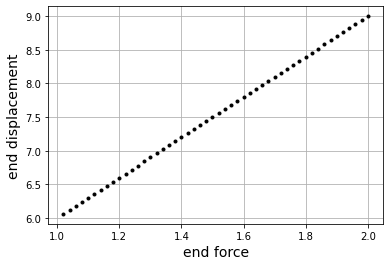

In [20]:
# LU demo
%matplotlib inline
import numpy as np                 # import math functions
import matplotlib.pyplot as plt    # import plot functions
import scipy.linalg as la          # import linear algebra functions

S = np.array([[2,-1,0],[-1,2,-1],[0,-1,1]])   # our stiffness matrix
LU, piv = la.lu_factor(S)                    # its LU factors
f = np.array([1.,1.,1.])            # our force vector

for j in range(50):
    f[2] = f[2] + 0.02             # increase the second force
    x = la.lu_solve((LU, piv), f)  # find its displacement
    plt.plot(f[2],x[2],'k.')       # plot displacement vs. force
    
plt.grid('on')
plt.xlabel('end force', fontsize=14)
plt.ylabel('end displacement', fontsize=14);

**Figure 3.** Using python to solve a whole family of mechanical problems.

On running this script you should observe that  `x[2] = 3+3f[2]`.
You are correct in pointing out that we could have also
just precomputed the inverse of $S$ and then sequentially applied it
in our for loop. The use of the inverse is, in general, considerably
more costly in terms of both memory and operation counts. The exercises
will give you a chance to see this for yourself.

You may also be wondering if Gaussian Elimination always works
so well. We first consider an example of trouble from which we can
recover.  If

\begin{equation}
   B = \begin{pmatrix} 2 & 2 & 2 \cr 4 & 4 & 0 \cr 0 & 5 & 3 \end{pmatrix}  \label{eq:Bswap}
\end{equation}

then elimination in column one brings

\begin{equation*}
  EB = \begin{pmatrix}
   2  & 2  & 2 \\
   0  & 0  & -4 \\
   0  & 5  & 3 \end{pmatrix}. \nonumber
\end{equation*}

The zero in the (1,1) position seems to defeat our simple implementation
of Gaussian Elimination. A little thought brings two alternatives to
eliminating the pesky 5. If we use row 0, instead of row 1, to eliminate the
5 then we will destroy the good work we did in column 0 in getting to $EB$.
A better idea is to simply swap rows 1 and 2 in $EB$. This is a perfectly
fine thing to do - for rows correspond to equations and the "order" in
which the equations appear has no bearing on their solution.
This row swap may itself be achieved by multiplication by the
 **elementary permutation matrix**
 
\begin{equation}
 P = \begin{pmatrix} 1  & 0  & 0 \\ 0  & 0  & 1 \\ 0  & 1  & 0 \end{pmatrix}.  
     \label{eq:elperb}
\end{equation}

In particular

\begin{equation}
  U=PEB = \begin{pmatrix}
   2  & 2  & 2 \\
   0  & 5  & 3 \\
   0  & 0  & -4 \end{pmatrix}. \label{eq:geperm}
\end{equation}

Regarding the associated lower triangular matrix
we note that $P$ is its own inverse and so

\begin{equation*}
  P U=EB \and E^{-1}P U = B.
\end{equation*}

If we define $L\equiv E^{-1}P$ then we call
$L$ a *psychologically lower triangular matrix*, i.e., a product of lower
triangular and elementary permutation matrices. We could of course construct
larger examples that require multiple row swaps. There are however many
matrices in which even row swapping won't help.

A more careful look at back substitution reveals that the key to solving
$Sx=f$
was the fact that no diagonal element of $U$ vanished. These quantities are
so important that we pause to name them.

\begin{definition}\label{def:pivdef} The diagonal elements of the upper
triangular matrix, $U$, achieved via the application of Gaussian Elimination
to $S$ are called the  **pivots** of $S$.
\end{definition}

If each pivot of $S$ is nonzero then $S$ is said to be  **invertible**,
or  **nonsingular**.
If one or more pivots of $S$ is zero then $S$ is said to be  **noninvertible**,
or  **singular**.

Pivots also provide the most concrete setting by which to define and study the
determinant. In what follows we define the determinant, by fiat, for two
special classes of matrices and then use pivots to extend the definition to
all square matrices. The special classes are  **triangular** matrices, 
i.e, matrices whose elements are all zero either above or below the diagonal,
and so called  **elementary permutations**, i.e., matrices
achieved by exchanging two rows in the identity matrix, as in (\ref{eq:elperb}).

\begin{definition}\label{def:detdef} If $A$ is square we denote the
 **determinant** of $A$ by $\det(A)$. 
 
(i) If $A$ is triangular then $\det(A)$ is the product of its diagonal elements. 

(ii) If $A$ is an elementary permutation of the identity then $\det(A)=-1$. 

(iii) The  **determinant** of an arbitrary square matrix $A$
is $(-1)^m$ times the product of the pivots of $A$,
where $m$ is the number of requisite  **row swaps**. 
\end{definition}

Looking back over our two examples we recognize that $\det(S)=4$ for the
$S$ in (\ref{eq:Kxb}) and $\det(B)=40$ for the $B$ in (\ref{eq:Bswap}).

Finally, we ask what the lovely formulas, (\ref{eq:e2e1su}) and
(\ref{eq:geperm}), tell us about the
determinants of products. More precisely, as elimination of $S$ required no
row swaps, from

\begin{equation*}
  \det(S) = \det(E_2E_1S) = \det(U) \and \det(E_1)=\det(E_2)=1 \nonumber
\end{equation*}

we infer that

\begin{equation}
  \det(ES)=\det(E)\det(S)   \label{eq:detES}
\end{equation}

for arbitrary $S$ so long as $E$ is an elementary elimination matrix.
While, as elimination of $B$ required one row swap we infer from

\begin{equation}
  \det(B) = -\det(U) = -\det(P EB) \and \det(P)=-1 \label{eq:detp2}
\end{equation}

that

\begin{equation}
  \det(PB) = \det(P)\det(B) \label{eq:detPB}
\end{equation}

for arbitrary $B$ so long as $P$ is an elementary permutation matrix.
Hence, as the LU decomposition guarantees that every matrix is the product
of elementary matrices it follows from (\ref{eq:detp2}) and (\ref{eq:detPB}) that

\begin{equation}
  \boxed{\det(AB)=\det(A)\det(B)} \label{eq:detprod}
\end{equation}

for every $A$ and $B$ in $\maR^{n\times n}$. Though this definition of determinant as the (signed) product of pivots is the right definition for numerical evaluation of a given matrix it does not lend itself to the common cases where our matrix has structure or is one in a family of matrices. For that reason we pursue an alternate formulation of the determinant. 

We first explore the **multilinearity** of $\det(B)$ as a function of the rows of $B$. To that end, we write

\begin{equation*}
  B = (b_1;\ldots;b_i;\ldots;b_n)
\end{equation*}

as a collection of $n$ rows with each $b_i\in\maR^n$.

\begin{proposition}\label{prop:gt1a} Elementary row operations do not
change the determinant. That is, for $a\in\maR$,

\begin{equation}
  \det(b_1;\ldots;b_{i-1};b_i;b_{i+1};\ldots;b_n) 
  = \det(b_1;\ldots;b_{i-1};b_i+ab_j;b_{i+1};\ldots;b_n) \label{eq:detprop1}
\end{equation}

The determinant is multilinear in the sense that

\begin{equation}
  \det(b_1;\ldots;b_{i-1};ab_i;b_{i+1};\ldots;b_n) 
  = a\det(b_1;\ldots;b_{i-1};b_i;b_{i+1};\ldots;b_n) \label{eq:detprop2}
\end{equation}

and

\begin{equation}
  \det(b_1;\ldots;b_{i-1};v+w;b_{i+1};\ldots;b_n) 
 = \det(b_1;\ldots;b_{i-1};v;b_{i+1};\ldots;b_n)  
    + \det(b_1;\ldots;b_{i-1};w;b_{i+1};\ldots;b_n). \label{eq:multilin}
\end{equation}
\end{proposition}

**Proof:** The first claim follows from the product formula, (\ref{eq:detprod}),
$\det(EB)=\det(E)\det(B)$ where $E$ is the elimination matrix comprised of
the identity matrix with the addition of $a$ in row $j$ column $i$. As $E$ is
unit-triangular we find $\det(E)=1$ and conclude (\ref{eq:detprop1}).

Our second claim, (\ref{eq:detprop2}), also follows from the product formula, 
$\det(AB)=\det(A)\det(B)$ where $A$ is the identity matrix except for
$A_{ii}=a$.

Regarding the third claim,
if the $n-1$ rows $(b_1;\ldots;b_{i-1};b_{i+1};\ldots;b_n)$
are linearly dependent then all three determinants in (\ref{eq:multilin}) are zero
and so equality holds trivially. If they are instead linearly independent
that we can complete them to a basis for $\maR^n$ with
some vector $b_i$. We then expand $v$ and $w$ in this basis as

\begin{equation*}
  v = \sum_{j=1}^n v_j b_j \and w = \sum_{j=1}^n w_j b_j.
\end{equation*}

Now it follows from \ref{eq:detprop1} that

\begin{equation*}
 \det(b_1;\ldots;b_{i-1};v+w;b_{i+1};\ldots;b_n)=
\det(b_1;\ldots;b_{i-1};v+w-(v_1+w_1)b_1;b_{i+1};\ldots;b_n).
\end{equation*}

Applying this reasoning to the remaining rows brings

\begin{equation}
  \det(b_1;\ldots;b_{i-1};v+w;b_{i+1};\ldots;b_n)
 = \det(b_1;\ldots;b_{i-1};(v_i+w_i)b_i;b_{i+1};\ldots;b_n) 
 = (v_i+w_i)\det(b_1;\ldots;b_{i-1};b_i;b_{i+1};\ldots;b_n) 
   \label{eq:nicestep}
\end{equation}

where the second equality follows from (\ref{eq:detprop2}). Now
rebuild $v$ and $w$ individually using (\ref{eq:detprop1}) again. More precisely

\begin{equation*}
  \eqalign{v_i\det(b_1;\ldots;b_{i-1};b_i;b_{i+1};\ldots;b_n)
 &= \det(b_1;\ldots;b_{i-1};v_ib_i;b_{i+1};\ldots;b_n) \cr
 &= \det(b_1;\ldots;b_{i-1};v_ib_i+v_1b_1;b_{i+1};\ldots;b_n) \cr}
\end{equation*}

and on continuation we find

\begin{equation*}
  v_i\det(b_1;\ldots;b_{i-1};b_i;b_{i+1};\ldots;b_n)
 = \det(b_1;\ldots;b_{i-1};v;b_{i+1};\ldots;b_n).
\end{equation*}

As the same logic applies to $w$ we deduce (\ref{eq:multilin}) from
(\ref{eq:nicestep}). **End of Proof.**

We next note that if $P$ is an elementary perturbation matrix then
$BP$ simply swaps two **columns** of $B$ and 
$\det(BP)=\det(B)\det(P)=-\det(B)$. This leads to our desired characterization,

\begin{proposition}\label{prop:gt2} **Cofactor Expansion**. For 
$B\in\maR^{n\times n}$ we denote its elements by $b_{i,j}$ and denote the
matrix achieved by ignoring row $i$ and column $j$ by $B(!i,!j)$. For any 
row index, $i$, we may expand the $\det(B)$ along this row as

\begin{equation}
  \det(B) = \sum_{j=1}^n b_{i,j}(-1)^{i+j}\det(B(!i,!j)). \label{eq:cofac}
\end{equation}
\end{proposition}

**Proof:** Let us set (for now) $i=1$. We denote the $j$th row of the identity matrix by $e_j$ and exploit the simple truth

\begin{equation*}
  b_1 = \sum_{j=1}^n b_{1,j}e_j
\end{equation*}

by noting that multilinearity, (\ref{eq:multilin}), permits

\begin{equation} \label{eq:Btele}
  \det(B) = \sum_{j=1}^n b_{1,j}\det(e_j;b_2;\ldots;b_n).
\end{equation}

We now evaluate these $n$ *simpler* determinants.
The first, $j=1$, $\det$ can be reduced, by row reduction to

\begin{equation} \label{eq:Bnot1}
  \det(e_1;b_2;\ldots;b_n) = 
  \det\begin{pmatrix} 1 & 0(1,n-1) \\
                      0(n-1,1) & B(!1,!1) \end{pmatrix} 
  = \det(B(!1,!1)).
\end{equation}

The second $\det$ in (\ref{eq:Btele}) can be reduced, by row reduction to

\begin{equation}\label{eq:Bnot2}
   \det(e_2;b_2;\ldots;b_n) = 
  \det\begin{pmatrix} 0 & 1 & 0(1,n-2) \\
                      B(2:n,1) & 0(n-1,1) & B(2:n,3:n) \end{pmatrix} 
  = -\det(B(!1,!2))
\end{equation}

after swapping columns and recalling that each column swap introduces a sign change.
The third $\det$ in (\ref{eq:Btele}) can be reduced, by row reduction to

\begin{equation}\label{eq:Bnot3}
  \det(e_3;b_2;\ldots;b_n) = 
  \det\begin{pmatrix} 0(1,2) & 1 & 0(1,n-3) \\
                      B(2:n,1:2) & 0(n-1,1) & B(2:n,4:n) \end{pmatrix} 
  = \det(B(!1,!3))
\end{equation}

after swapping columns twice. The pattern is now clear and so we have established (\ref{eq:cofac}) when $i=1$.

When $i=2$ we must reduce matrices of the form $(b_1;e_2;b_3;\ldots)$ and so a single row swap will return them
matrices like those in the $i=1$ case. 

When $i=3$ we must reduce matrices of the form $(b_1;b_2;e_3;b_4;\ldots)$ and so two row swaps are neceessary to bring $e_3$ to the top while maintaining the ordering of the $b_j$, i.e., to reach $(e_3;b_1;b_2;b_4;\ldots)$ from which we
may argue as in the $i=1$ case. The pattern is now set and so we established (\ref{eq:cofac}) in full. **End of Proof.**

Let's try this out an a few examples. To begin, the cofactor expansion agrees with our old

\begin{equation}
  \det\begin{pmatrix} a & b \\ c & d \end{pmatrix} = ad - bc
\end{equation}

Staying in familiar territory we check the cofactor expansion of an elementary permutation matrix

\begin{equation}
 \det\begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 0 \end{pmatrix} =
 \det\begin{pmatrix}  0 & 1 \\  1 & 0 \end{pmatrix} = (-1)(1) = -1
\end{equation}

and find agreement with Def. \ref{def:detdef}(ii). We next explore the 3-by-3 second difference matrix

\begin{equation}\label{eq:detS3}
 \det\begin{pmatrix} 2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 2 \end{pmatrix} =
 2\det\begin{pmatrix}  2 & -1 \\  -1 & 2 \end{pmatrix} + (-1)(-1)\det\begin{pmatrix}  -1 & -1 \\  0 & 2 \end{pmatrix}
   = (2)(3) + (-1)(2) = 4
\end{equation}

and check our arithmetic with this simple python cell,

In [ ]:
# determinant demo
import numpy as np
B = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
print('det(B) =', np.linalg.det(B))

\begin{exercise}\label{ex:invprod} Prove that if $A$ and $B$ are invertible then
$(AB)^{-1}=B^{-1}A^{-1}$.
\end{exercise}

\begin{exercise}\label{ex:elepert} Show that if $P$ is an elementary permutation of
$I$ then $PP=I$ and use this to arrive at $P^{-1}$.
\end{exercise}

\begin{exercise}\label{ex:rank1inv} Both elimination matrices and elementary permutation
matrices can be inverted with ease. One more class of such matrices are
those that are $A+uv^T$ where $A$ is invertible. Please show that

\begin{equation}
  (A+uv^T)^{-1} = A^{-1} + \frac{1}{1+v^TA^{-1}u}A^{-1}uv^TA^{-1}.
   \label{eq:rank1inveq}
\end{equation}

\end{exercise}

\begin{exercise}\label{ex:detinv} Note that $A$ is invertible then $AA^{-1}=I$. Use
(\ref{eq:detprod}) to show that $\det(A^{-1})=1/\det(A)$.
\end{exercise}

\begin{exercise}\label{ex:det2b2} (a) Compute the product of the pivots of

\begin{equation*}
  \begin{pmatrix} a & b \\ c & d \end{pmatrix}, \hskip 0.25in a\ne 0,
\end{equation*}

and compare your answer with Exer.~\secref{prelim}.\ref{vecsumex} and
discuss the relation of determinant to area.

(b) Compute the product of the pivots of
 
\begin{equation*}
  \begin{pmatrix} u_1 & v_1 & w_1  \\ u_2 & v_2 & w_2 \\ u_3 & v_3 & w_3 
  \end{pmatrix} \hskip 0.25in u_1\ne 0, \quad u_1v_2 \ne v_1u_2
\end{equation*}

and compare your answer with $|w^T(u\times v)|$ 
(recall Exer.~\secref{prelim}.\ref{cross}(h)) and
discuss the relation of determinant to volume.

 (c) Argue that if $X$ is a nice set 
in $\maR^3$ (in the sense that for each $x\in X$ there is a cube
centered at $x$ that also lies in $X$)  and $A$ is a $3$-by-$3$ matrix then

\begin{equation}
  \frac{{\rm volume}(AX)}{{\rm volume}(X)} = |\det(A)|,  \label{eq:detvol}
\end{equation}

where $AX=\{Ax:x\in X\}$. \index{determinant}
\end{exercise}

\begin{exercise}\label{ex:detSnex} (a) Use (\ref{eq:cofac}) and (\ref{eq:detS3}) to evaluate the determinant of the 4-by-4 second difference matrix

\begin{equation}
S_4 \equiv \begin{pmatrix} 2 & -1 & 0 & 0 \\  -1 & 2 & -1 & 0 \\ 0 & -1 & 2 & -1 \\ 0 & 0 & -1 & 2 \end{pmatrix}
\end{equation}

(b) Use the code cell below to observe that $\det(S_n)=n+1$. Now use (\ref{eq:cofac}) to show that the determinant of the second difference matrices satisfies the second difference equation

\begin{equation}\label{eq:detSn}
  \det(S_n) = 2\det(S_{n-1}) - \det(S_{n-2})
\end{equation}

\end{exercise}


In [ ]:
# Find the determinant of the n-by-n second difference matrix
from scipy.sparse import spdiags
n = 5
wons = np.ones(n)
d0 = 2*wons
d1 = -1*wons
data = np.array([d1, d0, d1])
diags = np.array([-1, 0, 1])
B = spdiags(data, diags, n, n).toarray()
print('B =', B)
print('det(B) =', np.linalg.det(B))

\begin{exercise}\label{ex:detCnex} (a) Use (\ref{eq:cofac}) to evaluate the determinant of the 3-by-3 DN second difference matrix

\begin{equation}
C_3 \equiv \begin{pmatrix} 2 & -1 & 0  \\  -1 & 2 & -1  \\ 0 & -1 & 1 \end{pmatrix}
\end{equation}

(b) Modify the code cell above to observe that $\det(C_n)=1$ for every $n\ge 2$. Now use (\ref{eq:cofac}) to show that the determinant of the DN second difference matrices satisfies the second difference equation

\begin{equation}\label{eq:detCn}
  \det(C_n) = 2\det(C_{n-1}) - \det(C_{n-2})
\end{equation}

\end{exercise}

## Planar Mechanical Networks

We move from uni-axial to biaxial elastic networks by first considering the 3-link frame in Figure \ref{fig:frame}.

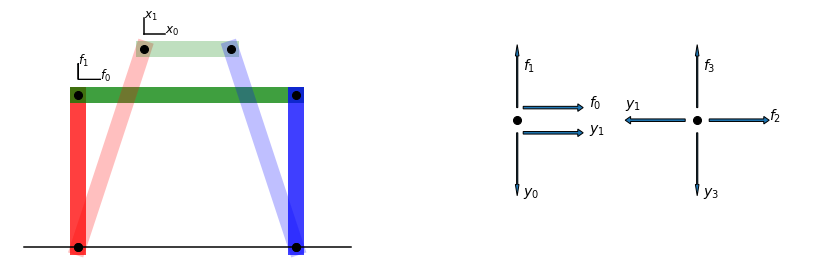

In [19]:
# draw the 3-link 2D fram, before and after stretching, together with a force diagram
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np  

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

colors = ['r', 'g', 'b']

X = np.array([0, 0, 1, 1])
Y = np.array([0, 1, 1, 0])

for i in range(3):
    ax1.plot(X[i:i+2], Y[i:i+2], colors[i], linewidth=16, alpha = 0.75) 
    ax1.plot(X[i], Y[i],  'ko', markersize=8)
    
ax1.plot(X[3], Y[3], 'ko', markersize=8)

ax1.arrow(0, 1.1, 0.1, 0)
ax1.text(0.1,1.1,'$f_0$', fontsize=12)
ax1.arrow(0, 1.1, 0, 0.1)
ax1.text(0,1.2,'$f_1$', fontsize=12)

dX = np.array([0, 0.3, -.3, 0])
X = X + dX
dY = np.array([0, 0.3, 0.3, 0])
Y = Y + dY

for i in range(3):
    ax1.plot(X[i:i+2], Y[i:i+2], colors[i], linewidth=16, alpha = 0.25) 
    ax1.plot(X[i], Y[i],  'ko', markersize=8)
    
ax1.plot(X[3], Y[3], 'ko', markersize=8)
ax1.plot([-0.25, 1.25], [0, 0], 'k')

ax1.plot([X[1], X[1]+0.1], [Y[1]+0.1, Y[1]+0.1],'k')
ax1.text(X[1]+0.1, Y[1]+0.1, '$x_0$', fontsize=12)
ax1.plot([X[1], X[1]], [Y[1]+0.1, Y[1]+0.2],'k')
ax1.text(X[1], Y[1]+0.2,'$x_1$', fontsize=12)

ax1.axis('off')

# force diagram on ax2

ax2.arrow(0.1,0,1,0,width=0.02,length_includes_head=True)
ax2.text(1.2,0.2,'$f_0$', fontsize=14)
ax2.plot(0,0.1, 'ko', markersize=8)
ax2.arrow(0.1,.2,1,0,width=0.02,length_includes_head=True)
ax2.text(1.2,0,'$y_1$', fontsize=14)
ax2.arrow(0,0,0,-0.5,width=0.02,length_includes_head=True)
ax2.text(0.1,-0.5,'$y_0$', fontsize=14)
ax2.arrow(0,.2,0,0.5,width=0.02,length_includes_head=True)
ax2.text(0.1,0.5,'$f_1$', fontsize=14)

ax2.arrow(3+0.2,0.1,1,0,width=0.02,length_includes_head=True)
ax2.text(3+1.2,0.1,'$f_2$', fontsize=14)
ax2.plot(3,0.1, 'ko', markersize=8)

ax2.arrow(3-0.2,.1,-1,0,width=0.02,length_includes_head=True)
ax2.text(3-1.2,0.2,'$y_1$', fontsize=14)

ax2.arrow(3+0,0,0,-0.5,width=0.02,length_includes_head=True)
ax2.text(3+0.1,-0.5,'$y_3$', fontsize=14)

ax2.arrow(3+0,.2,0,0.5,width=0.02,length_includes_head=True)
ax2.text(3+0.1,0.5,'$f_3$', fontsize=14)


ax2.set_xlim([-1,5])
ax2.set_ylim([-1,1])
#ax2.set_axis('equal')
ax2.axis('off');

\begin{myfig}\label{fig:frame}. **Left:** A 3-link frame secured at the bottom 2 nodes before (dark) and after (light) application of force at the 2 free nodes. The force, $f$, and displacement, $x$, indices and sign conventions are displayed for node 0. **Right:** The associated free body diagram at the two free nodes. \end{myfig}

Our first step, as in the previous section, is to express the elongation
of each link in terms of the displacements of its ends.
Begining with link 0 (red) in Figure \ref{fig:frame},
we suppose that it meets the foundation at position $(0,0)$ and that, when
at rest, its other end lies at $(0,\ell_0)$. When forced, as in
Figure \ref{fig:frame}, the ends of the deformed link now lie at $(0,0)$ and
$(x_0,\ell_0+x_1)$. As the elongation is simply the deformed length minus the
undeformed length we find

\begin{equation}
  e_0 = \sqrt{x_0^2+(\ell_0+x_1)^2} - \ell_0. \label{eq:exe}
\end{equation}

The price one pays for moving to higher dimensions is that lengths are
now expressed in terms of square roots. The upshot is that the elongations
are not linear combinations of the end displacements as they were in the 
uni-axial case. If we presume
however that the loads and stiffnesses are matched in the sense that
the displacements are small compared with the original link lengths then we
may effectively ignore the nonlinear contribution in (\ref{eq:exe}).
In order to make this precise we need only recall the Taylor development
of $\sqrt{1+t}$ about $t=0$, i.e.,

\begin{equation*}
  \sqrt{1+t} = 1 + t/2 + O(t^2)
\end{equation*}

where the latter term signifies that the remainder is of order $t^2$. 
With regard to $e_0$ this allows

\begin{equation*}
  \eqalign{e_0 &= \sqrt{x_0^2+x_1^2+2x_1\ell_0 + \ell_0^2} - \ell_0 \cr
               &= \ell_0\sqrt{1 + (x_0^2+x_1^2)/\ell_0^2+2x_1/\ell_0} - \ell_0 \cr
               &= \ell_0+(x_0^2+x_1^2)/(2\ell_0)+x_1 +
                      \ell_0O(((x_0^2+x_1^2)/\ell_0^2+2x_1/\ell_0)^2) - \ell_0 \cr
               &= x_1 + (x_0^2+x_1^2)/(2\ell_0) + 
                      \ell_0O(((x_0^2+x_1^2)/\ell_0^2+2x_1/\ell_0)^2). \cr}
\end{equation*}

If we now assume that

\begin{equation}
  (x_0^2+x_1^2)/(2\ell_0) \hskip 0.25in\hbox{is small compared to}\hskip 0.25in x_1
  \label{eq:small}
\end{equation}

then, as the $O$ term is even smaller, we may neglect all but the first
terms in the above and so arrive at 

\begin{equation*}
  e_0 = x_1. \nonumber
\end{equation*}

To take a concrete example, if $\ell_0$ is one meter and $x_0$ and $x_1$ are
each one centimeter than $x_1$ is one hundred times $(x_0^2+x_1^2)/(2\ell_0)$.

With regard to the second link, arguing as above, its elongation is
(approximately) its stretch along its initial direction. As its initial
direction is horizontal, its elongation is just the difference of the
respective horizontal end displacements, namely,

\begin{equation*}
  e_1 = x_2 - x_0. \nonumber
\end{equation*}

Finally, the elongation of the third link is (approximately) the
difference of its respective vertical end displacements, i.e.,

\begin{equation*}
  e_2 = x_3. \nonumber
\end{equation*}

We encode these three elongations in

\begin{equation*}
  e = Ax \where A=\begin{pmatrix}0 & 1 & 0 & 0 \cr
                          -1 & 0 & 1 & 0 \cr
		           0 & 0 & 0 & 1 \end{pmatrix}. \nonumber
\end{equation*}

Hooke's law is an elemental piece of physics and is not perturbed by our
leap from uni-axial to biaxial structures.
Hence, the restoring force in each
link remains proportional to its elongation, i.e., $y_j=k_je_j$ where
$k_j$ is the stiffness of the $j$th link. In matrix terms,

\begin{equation*}
  y = Ke \where K = \begin{pmatrix}k_0 & 0 & 0 \cr 0 & k_1 & 0 \cr 0 & 0 & k_2 \end{pmatrix}. \nonumber
\end{equation*}

As in the uni-axial case, as positive $y_j$ pulls on its ends we
find the free body diagrams of Figure \ref{fig:frame}.

Balancing horizontal and vertical forces at node 0 then brings

\begin{equation*}
  y_1 + f_0 = 0 \and y_0 = f_1, \nonumber
\end{equation*}

while balancing horizontal and vertical forces at node 1 brings

\begin{equation*}
  y_1 = f_2 \and y_2 = f_3. \nonumber
\end{equation*}

We assemble these into 

\begin{equation*}
  By = f \where B = \begin{pmatrix}0 & -1 & 0 \cr
                             1 & 0  & 0 \cr
                             0 & 1  & 0 \cr
                             0 & 0 &  1 \end{pmatrix},  \nonumber
\end{equation*}

and recognize, as expected, that $B$ is nothing more than $A^T$.
Putting the pieces together, we find that $x$ must satisfy $Sx=f$ where

\begin{equation*}
  S = A^TKA = \begin{pmatrix}k_1 & 0 & -k_1 & 0 \cr
    0 & k_0 & 0 & 0 \cr -k_1 & 0 & k_1 & 0 \cr 0 & 0 & 0 & k_2 \end{pmatrix}. \nonumber
\end{equation*}

Applying one step of Gaussian Elimination brings

\begin{equation*}
  \begin{pmatrix}k_1 & 0 & -k_1 & 0 \cr
    0 & k_0 & 0 & 0 \cr 0 & 0 & 0 & 0 \cr 0 & 0 & 0 & k_2 \end{pmatrix}
  \begin{pmatrix}x_0 \cr x_1 \cr x_2 \cr x_3 \end{pmatrix} = 
  \begin{pmatrix}f_0 \cr f_1 \cr f_0+f_2 \cr f_3 \end{pmatrix} \nonumber
\end{equation*}

and back substitution delivers

\begin{equation*}
  \eqalign{x_3 &= f_3/k_2, \cr
             0 &= f_0+f_2, \cr
	   x_1 &= f_1/k_0, \cr
        x_0 - x_2 &= f_0/k_1. \cr}  \nonumber
\end{equation*} 

The second of these is remarkable in that it contains no
components of $x$. Instead, it provides a condition on $f$.
In mechanical terms, it states that there can be no
equilibrium unless the horizontal forces on the two masses
are equal and opposite. Of course one could have observed
this directly from the layout of the frame. In modern,
three-dimensional structures with thousands of members
meant to shelter or convey humans one should not however
be satisfied with the "visual" integrity of the structure. 
In particular,
one desires a detailed description of all loads that can,
and, especially, all loads that can not, be equilibrated by 
the proposed
structure. In algebraic terms, given a matrix $S$ one desires
a characterization of (1) all those $f$ for which $Sx=f$
possesses a solution and (2)  all those $f$ for which $Sx=f$
does not possess a solution. We provide such a characterization
in the next chapter in our discussion of the  *column space*  of a 
matrix.

Supposing now that $f_0+f_2=0$ we note that although the 
system above is consistent it still fails to uniquely determine
the four components of $x$. In particular, it specifies only
the difference between $x_0$ and $x_2$. As a result both

\begin{equation*}
  x = \begin{pmatrix}f_0/k_1 \cr f_1/k_0 \cr 0 \cr f_3/k_2 \end{pmatrix} \and
  x = \begin{pmatrix}0 \cr f_1/k_0 \cr -f_0/k_1  \cr f_3/k_2 \end{pmatrix} \nonumber
\end{equation*}

satisfy $Sx=f$. In fact, one may add to either an arbitrary
multiple of

\begin{equation}
  z \equiv \begin{pmatrix}1 \cr 0 \cr 1 \cr 0\end{pmatrix} \label{eq:z}
\end{equation}

and still have a solution of $Sx=f$. Searching for the source 
of this lack of uniqueness we observe some redundancies in the
columns of $S$. In particular, the third is simply the opposite
of the first. As $S$ is simply $A^TKA$ we recognize that the
original fault lies with $A$, where again, the first and third
columns are opposites. These redundancies are encoded in $z$ in the
sense that

\begin{equation}
  Az = 0. \label{eq:Az0}
\end{equation}

Interpreting this in mechanical terms, we view $z$ as a displacement
and $Az$ as the resulting elongation. In $Az=0$ we see a nonzero
displacement producing zero elongation. One says in this case that the
network deforms without doing any work and speaks of $z$ as an 
 **unstable mode**.
Again, this mode could have been observed by a simple glance
at Figure \ref{fig:frame}. Such is not the case for more complex structures and so
the engineer seeks a systematic means by which  *all*  unstable
modes may be identified. We shall see in the next chapter that these modes are
captured by the  *null space*  of $A$. For now we will deem our
system  **stable** if $z=0$ is the only solution to (\ref{eq:Az0}).
From $Sz=0$ one easily deduces that $S$ is  **singular**. More precisely, if
$S^{-1}$ were to exist then $S^{-1}Sz$ would equal $S^{-1}0$, i.e., $z=0$,
contrary to (\ref{eq:z}). <!-- As a result, `linalg.solve` will fail to solve $Sx=f$ even
when $f$ is a force that the truss can equilibrate. One way out is to use
the pseudo-inverse, as we shall see below.-->

\begin{exercise}\label{ex:swingexe} With regard to Figure\ref{fig:frame}

(i) Derive the $A$ and $K$ matrices resulting from the addition of
a fourth (diagonal) link that runs from the fixed node at lower left to the free node at upper right
and assemble $S=A^TKA$.

(ii) Compute $S^{-1}$, by hand via Gauss-Jordan, and compute $L$ and $U$
where $S=LU$ by hand via the composition of elimination matrices and their inverses.
Assume throughout that with $k_0=k_1=k_2=k_3=k$.

(iii) Use the result of (ii) with the load $f=[0\ 0\ F\ 0]^T$ to
solve $Sx=f$ by hand two ways, i.e., $x=S^{-1}f$ and $Lc=f$ and $Ux=c$.
\end{exercise}

### The Taut String

We begin by showing that our original horizontal net can not sustain a vertical force.

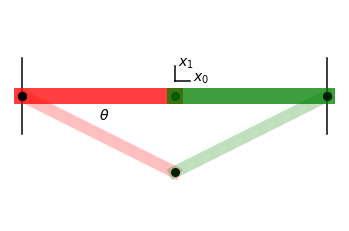

In [39]:
# The 2-link horizontal net 
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np  

plt.plot([0, 0], [-.25,.25], 'k')
plt.plot([2, 2], [-.25,.25], 'k')

plt.plot([0,1], [0, 0], 'r', linewidth=16, alpha = 0.75) 
plt.plot([0, 1, 2], [0, 0, 0], 'ko', markersize = 8)
plt.plot([1,2], [0, 0], 'g', linewidth=16, alpha = 0.75)

plt.plot([1, 1.1],[.1, .1],'k')
plt.text(1.12,0.1,'$x_0$', fontsize=14)
plt.plot([1,1],[.1,.2],'k')
plt.text(1.025,0.2,'$x_1$', fontsize=14)

plt.plot([0,1], [0, -.5], 'r', linewidth=12, alpha = 0.25) 
plt.plot([0, 1, 2], [0, -.5, 0], 'ko', markersize = 8)
plt.plot([1,2], [-.5, 0], 'g', linewidth=12, alpha = 0.25)

plt.text(0.5,-0.15,'$\\theta$', fontsize=14)

plt.axis('equal')
plt.axis('off');

\begin{myfig}\label{fig:Tfib0} A 2-link horizontal net under tension with one free node, subject to a vertical load. \end{myfig}

Arguing as above we find that the associated incidence matrix is
 
\begin{equation*}
  A = \begin{pmatrix} 1 & 0 \\ -1 & 0 \end{pmatrix}  \nonumber
\end{equation*}

and that the final system takes the form

\begin{equation*}
  \begin{pmatrix} 2k & 0 \\ 0 & 0 \end{pmatrix}
\begin{pmatrix} x_0 \\ x_1 \end{pmatrix} = 
\begin{pmatrix} f_0 \\ f_1\end{pmatrix}  \nonumber
\end{equation*}

Conclude that this system has no solutions unless the transverse force, $f_1$, vanishes.
In this case solve for $x_0$ and recognize that $x_1$ is arbitrary.

(b) The culprit here is a nonzero vector $z$ for which $Az=0$. Exhibit such a $z$ and
explain in what sense it is a displacement that produces no "first order" elongation.

(c) The way out of this situation is to note that there is also a nonzero vector $y$ for which
$A^Ty=0$. Note that $y=\tau(1,1)^T$ obeys $A^Ty=0$ for all $\tau\in\maR$. We think of $\tau$ as a  **tension** and the associated $y$ as a **pre-stress**. This is achieved by stretching two short links and joining them at the center node. In this case, ignoring horizontal displacements and forces, we arrive at the deformation in Figure \ref{fig:Tfib0}.
Argue that vertical force balance at the mass requires
 
\begin{equation}
  2\tau\sin\theta = f_1  \label{eq:TF0}
\end{equation}

and that for small $\theta$, $\sin\theta\approx\tan\theta = x_1/\ell$, where $\ell$ is the length of each link. On placing this in (\ref{eq:TF0}) arrive at the linear equation

\begin{equation}
  (2\tau/\ell) x_1 = f_1  \label{eq:TF1}
\end{equation}

determining vertical displacement from vertical force. Now that we have discovered a work-around let's see if it survives the passage to multiple links.

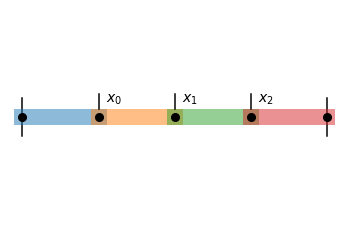

In [8]:
# The 4-link horizontal net 
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np  

plt.plot([0, 0], [-.25,.25], 'k')
plt.plot([4, 4], [-.25,.25], 'k')

for i in range(4):
    plt.plot([i,i+1], [0, 0], linewidth=16, alpha = 0.5) 
    
plt.plot([0, 1, 2, 3, 4], [0, 0, 0, 0, 0], 'ko', markersize = 8)

for i in range(1,4):
    plt.plot([i,i],[.1,.3],'k')
    plt.text(i+.1,0.2,'$x_'+str(i-1)+'$', fontsize=14)

plt.axis('equal')
plt.axis('off');

\begin{myfig}\label{fig:Tfib1} Four horizontal links in tension responding to vertical forces. The vertical displacement of node $j$ is $x_j$. \end{myfig}

With regard to Figure \ref{fig:Tfib1} we ignore horizontal forces and displacements and arrive at the 
transverse elongations

\begin{equation*}
  e_0 = x_0, \hskip 0.25in e_1=x_1-x_0, \hskip 0.25in e_2 = x_2-x_1, \hskip 0.25in e_3=-x_2 \nonumber
\end{equation*}

as the ends are assumed fixed. We recognize this as $e=Ax$ where

\begin{equation*}
  A = \begin{pmatrix} 1 & 0 & 0  \\
                              -1 & 1 & 0  \\
												 0 & -1 & 1  \\
												 0 & 0 & -1  \end{pmatrix} \nonumber
\end{equation*}

Now each elongation produces an associated restoring force. We have
illustrated this for the third mass in \fig\figref{TransFib}(B). The associated vertical
force is vertical component of tension,

\begin{equation}
  y_3 = \tau\sin(\theta) = \tau e_3/c   \label{eq:transy4}
\end{equation}

where $c$ is the hypotenuse

\begin{equation}
   c = \sqrt{\ell^2 + e_3^2} = \ell\sqrt{1+(e_3/\ell)^2} \approx 
       \ell(1+(1/2)(e_3/\ell)^2) \approx \ell,  \label{eq:chyp}
\end{equation}

where the first approximation is Taylor's Theorem and the second approximation is the structural hypothesis that elongations are small relative segment lengths. On substituting (\ref{eq:chyp}) into (\ref{eq:transy4}) we find

\begin{equation*}
   y_1 = \frac{\tau}{\ell}e_1, \hskip 0.25in y_2=\frac{\tau}{\ell}e_2,
  \hskip 0.25in y_3 = \frac{\tau}{\ell}e_3, \hskip 0.25in y_4 = \frac{\tau}{\ell}e_4  \nonumber
\end{equation*}

which reads $y=Ke$. In contrast with the longitudinal case we see that
the tension, $\tau$, has replaced the product, $Ya$, of Young's modulus and cross-sectional area.

Finally, force balance at the $j$th node reveals that
the difference between the two associated restoring forces is the associated vertical load;

\begin{equation*}
  y_j - y_{j+1} = f_j  \nonumber
\end{equation*}

that is, $A^Ty=f$. We assemble these and find

\begin{equation}
  \frac{\tau}{\ell}\begin{pmatrix}2 & -1 & 0 \cr
           -1 & 2 & -1 \cr
            0 & -1 & 2 \end{pmatrix}
  \begin{pmatrix}x_1 \cr x_2 \cr x_3\end{pmatrix} = 
  \begin{pmatrix}f_0 \cr f_1 \cr f_2\end{pmatrix} \label{eq:FibTranexact}
\end{equation}

We build and solve this system in the code cell below.

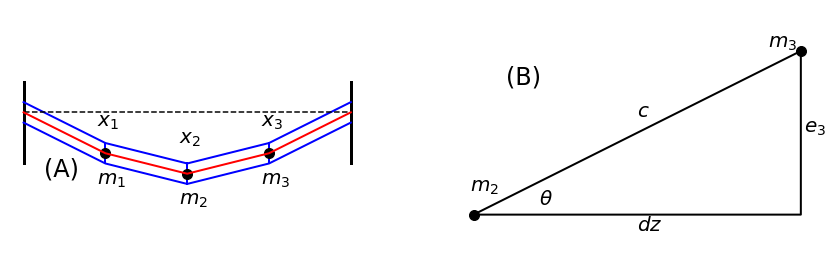

In [29]:
# draw transverse fiber setup
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

ax1.plot([0, 0],[1.25, .25],'k',linewidth=3)  # left wall
ax1.plot([4, 4],[1.25, .25],'k',linewidth=3)  # right wall

ax1.plot([0, 1, 2, 3, 4],[1, .5, .25, .5, 1],'b',linewidth=2)  # top of fiber
ax1.plot([0, 1, 2, 3, 4],[.75, .25, 0, .25, .75],'b',linewidth=2)  # top of fiber
ax1.plot([1, 1],[.5, .25],'b',linewidth=2)
ax1.plot([2, 2],[.25, 0],'b',linewidth=2)
ax1.plot([3, 3],[.5, .25],'b',linewidth=2)

ax1.plot([0, 4],[.875, .875],"k--")  # reference linewidth
ax1.plot(1,0.375,'k.',markersize=20)
ax1.plot(2,0.125,'k.',markersize=20)
ax1.plot(3,0.375,'k.',markersize=20)
ax1.plot([0, 1, 2, 3, 4],[0.875, 0.375, 0.125, 0.375, 0.875],'r',linewidth=2)

ax1.text(1-.1,0.7,'$x_1$',fontsize=20)
ax1.text(1-.1,0,'$m_1$',fontsize=20)
ax1.text(2-.1,0.5,'$x_2$',fontsize=20)
ax1.text(2-.1,-.25,'$m_2$',fontsize=20)
#ax1.plot([1.5, 1.5],[0.5, .75],'k')
ax1.text(3-.1,0.7,'$x_3$',fontsize=20)
ax1.text(3-.1,0,'$m_3$',fontsize=20)

ax1.text(0.25,0.1,'(A)',fontsize=24)

ax1.axis('equal')
ax1.axis('off');

ax2.plot(0,0,'k.',markersize=20)
ax2.text(-0.01,0.07,'$m_2$',fontsize=20)

ax2.plot(1,0.5,'k.',markersize=20)
ax2.text(0.9,0.51,'$m_3$',fontsize=20)
ax2.plot([0, 1, 1, 0],[0, 0, 0.5, 0],'k',linewidth=2)

ax2.text(0.2, 0.03,'$\\theta$',fontsize=20)
ax2.text(0.5,-0.05,'$dz$',fontsize=20)
ax2.text(1.01,0.25,'$e_3$',fontsize=20)
ax2.text(0.5,0.3,'$c$',fontsize=20)

ax2.text(0.1,0.4,'(B)',fontsize=24)
ax2.axis('equal')
ax2.axis('off');

**Figure** {TransFib}. Transverse motion of a string fixed at its two ends. (A) We have divided the string into four segments and labeled the transverse displacements, $x_j$, of
their junctions with respect to the unloaded center (dashed) line. The red segments are four springs that carry tension between masses and walls.
(B) An aid to estimating the restoring force at the third mass.

In [53]:
#  TransFib1.m  

ell = 1	# fiber length (m)
tau = 1	# fiber tension (N)

N = 4
    
A = np.zeros((N,N-1))	# initialize incidence matrix
A[0,0] = 1
for j in range(1,N-1):  # build A one row at a time
    A[j,j-1:j+1] = [-1, 1]
           
A[N-1,N-2] = -1

K = np.ones(N)
K = np.diag(K*tau/ell)
    
S = A.T @ K @ A   # assemble main matrix
    
f = np.random.randn(N-1,1)	# assemble the stimulus vector
    
x = np.linalg.solve(S,f)	# solve for the potentials
    
#xtra = np.zeros(N+1)    
#xtra[1:N] = x     # xtra now has zeros at ends

## A Large Planar Network

We next consider the larger planar net in  Figure \ref{fig:skin}.
Elastic links, numbered 0 through
19, meet at nodes, numbered 0 through 8. We limit our observation to
the motion of the nodes by denoting the horizontal and vertical
displacements of node $j$ by $x_{2j}$ and $x_{2j+1}$ respectively.
Retaining the convention that up and right are positive we note that
the elongation of link 0 is

\begin{equation*}
  e_0 = x_7 - x_1
\end{equation*}

while that of link 2 is

\begin{equation*}
  e_2 = x_2 - x_0.
\end{equation*}

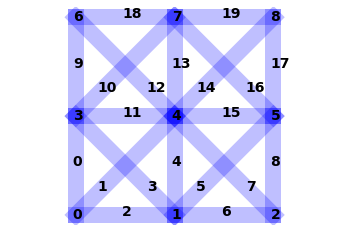

In [84]:
# draw the bignet
%matplotlib inline
import matplotlib.pyplot as plt   
import numpy as np

# display links and link numbers
b = 0
for j in range(2):
    for i in range(2):
        plt.plot([i,i],[j, j+1], 'b', alpha = 0.25, linewidth=16)  #vert
        plt.text(i-.03,j + 1/2,str(b), fontsize=14, weight='bold')
        
        plt.plot([i,i+1],[j, j+1], 'b', alpha = 0.25,linewidth=16)  #diag
        plt.text(i+1/4-.03,j+1/4,str(b+1), fontsize=14, weight='bold')
        
        plt.plot([i,i+1],[j, j], 'b', alpha = 0.25,linewidth=16)  #horiz
        plt.text(i + 1/2-.03,j,str(b+2), fontsize=14, weight='bold')
        
        plt.plot([i,i+1],[j+1, j], 'b', alpha = 0.25,linewidth=16)  #antidiag
        plt.text(i+3/4-.03,j+1/4,str(b+3), fontsize=14, weight='bold')
        
        b = b + 4
        
    plt.plot([i+1,i+1],[j, j+1], 'b', alpha = 0.25,linewidth=16)  #antidiag
    plt.text(i+1-.03,j+1/2,str(b), fontsize=14, weight='bold')
        
    b = b + 1

plt.plot([0,1], [2,2], 'b', alpha = 0.25,linewidth=16)
plt.text(1/2-.03,2,str(b), fontsize=14, weight='bold')
plt.plot([1,2], [2,2], 'b', alpha = 0.25,linewidth=16)
plt.text(3/2-.03,2,str(b+1), fontsize=14, weight='bold')

# display node numbers
n = 0
for j in range(3):
    for i in range(3):
        plt.text(i-.03,j-.03, str(n), fontsize=14, weight='bold') 
        n = n + 1

plt.axis('equal')
plt.axis('off');

\begin{myfig}\label{fig:skin}. A crude tissue model comprised of 20 elastic links meeting at 9 nodes. \end{myfig}

As links 1 and 3 are neither vertical nor horizontal their elongations,
in terms of nodal displacements, are not so easy to read off. This is more
a nuisance than an obstacle however, for recalling our earlier discussion,
the elongation is approximately just the stretch along its undeformed axis.
With respect to link 1, as it makes the angle $\pi/4$ with respect to the
positive horizontal axis, we find

\begin{equation*}
  e_1 = (x_8-x_0)\cos(\pi/4) + (x_9-x_1)\sin(\pi/4) = 
        (x_8-x_0+x_9-x_1)/\sqrt 2. \nonumber
\end{equation*}

Similarly, as link 3 makes the angle $3\pi/4$ with respect to the
positive horizontal axis, its elongation is

\begin{equation*}
  e_4 = (x_6-x_2)\cos(3\pi/4) + (x_7-x_3)\sin(3\pi/4) = 
        (x_2-x_6+x_7-x_3)/\sqrt 2. \nonumber
\end{equation*}

These are both direct applications of the general formula

\begin{equation}
  e_j = (x_{2n-1}-x_{2m-1})\cos(\theta_j) + (x_{2n}-x_{2m})\sin(\theta_j)
  \label{eq:ej}
\end{equation}

for link $j$, as depicted in Figure \ref{fig:genbar}, connecting node $m$ to node 
$n$ and making the angle $\theta_j$
with the positive horizontal axis when node $m$ is assumed to lie at
the point $(0,0)$. The reader should check that our expressions for
$e_1$ and $e_3$ indeed conform to this general formula and that $e_2$ and
$e_4$ agree with one's intuition. For example, visual inspection of the
specimen suggests that link 2 can not be supposed
to stretch (i.e., have positive $e_2$) unless $x_9>x_1$ and/or $x_{10}>x_2$.
Does this jibe with (\ref{eq:ej})?

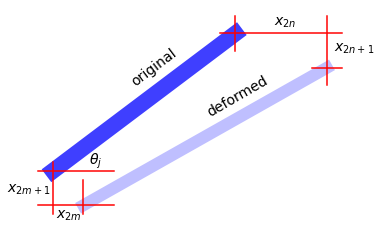

In [6]:
# draw general fiber
%matplotlib inline
import matplotlib.pyplot as plt   
import numpy as np

plt.plot([0,6], [0,4], 'b', linewidth=16, alpha=0.75)
plt.text(2.5,2.5,'original', rotation = 37, fontsize=14)
plt.text(5,1.6,'deformed', rotation = 30, fontsize=14)
plt.text(1.2,0.2,'$\\theta_j$', fontsize=14)

plt.plot([1,9], [-1,3], 'b', linewidth=12, alpha=0.25)
plt.plot([-0.5,2],[0,0],'r')
plt.plot([-0.5,2],[-1,-1],'r')
plt.text(0.1,-1.35,'$x_{2m}$', fontsize=14)
plt.plot([0,0],[-1.25,0.25],'r')
plt.plot([1,1],[-1.25,-0.25],'r')
plt.text(-1.5,-0.6,'$x_{2m+1}$', fontsize=14)

plt.plot([5.5,9.5],[4,4],'r')
plt.plot([8.5,9.5],[3,3],'r')
plt.text(7.25,4.25,'$x_{2n}$', fontsize=14)
plt.plot([6,6],[3.5,4.5],'r')
plt.plot([9,9],[2.5,4.5],'r')
plt.text(9.25,3.5,'$x_{2n+1}$', fontsize=14)

plt.axis('off');

\begin{myfig}\label{fig:genbar} Deformation of elastic link $j$ connecting nodes $m$ and $n$. Its original orientation, $\theta_j$, and end displacements, $x_i$, determine its elongation per (\ref{eq:ej}). \end{myfig}

Applying (\ref{eq:ej}) to each of the remaining links we arrive at $e=Ax$ where
$A$ is 20-by-18, one row for each link, and one column for each degree of
freedom. For systems of such size with such a well defined structure one
naturally hopes to automate the construction. We have done just that in
the accompanying  `skin.m`. It begins with a matrix of raw
data that anyone with a protractor could have keyed in directly from 
\fig\figref{ex3}.
More precisely, the data matrix has a row for each link and each row
consists of the starting and ending node numbers and the angle the link
makes with the positive horizontal axis. This data is precisely what (\ref{eq:ej})
requires in order to know which columns of $A$ receive the proper $\cos$ or
$\sin$ values. The nonzero structure of the final $A$ matrix is displayed in 
the \fig\figref{skin}(A).

The next two steps are now familiar. If $K$ denotes the diagonal matrix of
link stiffnesses and $f$ denotes the vector of nodal forces then
$y=Ke$ and $A^Ty=f$
and so one must solve $Sx=f$ where $S=A^TKA$. In this case there is an entire
three-dimensional class of $z$ for which $Az=0$ and therefore $Sz=0$. The
three indicates that there are three independent unstable modes of the 
specimen, e.g., two translations and a rotation. As a result $S$ is singular and
$ `x=S\backslash f`$ in \Matlab\ will get us nowhere. The way out is to recognize that
$S$ has $18-3=15$ stable modes and that if we restrict $S$ to `act' only in
these directions then it `should' be invertible. We will begin to make these
notions precise in Chapter \secref{fund} on the Fundamental Theorem of 
Linear Algebra.

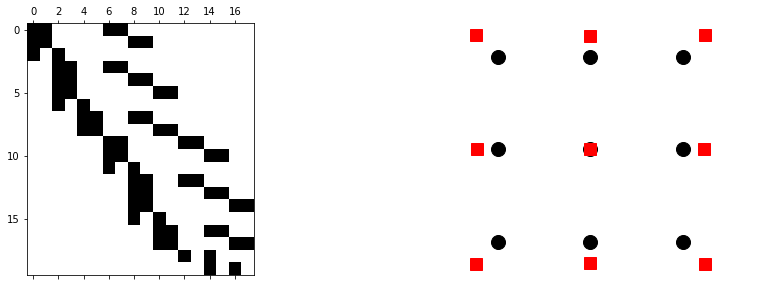

In [88]:
# skin
%matplotlib inline
import numpy as np    
import matplotlib.pyplot as plt 
import scipy.linalg as la

## Given a data array of node numbers and fiber angles generate
## the incidence matrix, A, for a small patch of skin. Assuming unit
## fiber stiffnesses, K, build A'KA. Then apply uniform traction, f, at the
## outer nodes, solve A^TKA x = f for x and plot the deformed and 
## undeformed nodes.

pi = np.pi

data = np.array([			# one row of data for each fiber, the
[1, 	4,	pi/2],		# first two columns are end-node numbers
[1,	5,	pi/4],		# while the third is the fiber angle
[1,	2,	0],
[2,	4,	3*pi/4],
[2,	5,	pi/2],
[2,	6,	pi/4],
[2,	3,	0],
[3,	5,	3*pi/4],
[3,	6,	pi/2],
[4,	7,	pi/2],
[4,	8,	pi/4],
[4,	5,	0],
[5,7,	3*pi/4],
[5,	8,	pi/2],
[5,	9,	pi/4],
[5,	6,	0],
[6,	8,	3*pi/4],
[6,	9,	pi/2],
[7,	8,	0],
[8,	9,	0]])

A = np.zeros((20,18))		# initialize the incidence matrix

for j in range(20):

    m = int(data[j,0]-1)    # subtract 1 as these are indexed starting from 1
    n = int(data[j,1]-1)
    theta = data[j,2]

    A[j,2*n] = np.cos(theta)	# direct implementation of general formula
    A[j,2*m] = -np.cos(theta)
    A[j,2*n+1] = np.sin(theta)
    A[j,2*m+1] = -np.sin(theta)


fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

ax1.spy(A)
 
K = np.eye(20)    # unit fiber stiffnesses
 
S = A.T @ K @ A    # the composite stiffness matrix

s = 1/np.sqrt(2)

f = 4*np.array([-s, -s, 0, -1, s, -s, -1, 0, 0, 0, 1, 0, -s, s, 0, 1, s, s])   # uniform traction

pS = la.pinv(S)   # the pseudoinverse if S

x = pS @ f       # the solution to A'KAx=f (with rigid body motions)

# draw the nodes of the original and deformed specimens

for h in range (1,4):    # plot the reference circle and its square translate

    ax2.plot(0,(h-1)*6,'ko',markersize=14)	# original
    ax2.plot(x[0+(h-1)*6],(h-1)*6 + x[1+(h-1)*6],'rs',markersize=12) # deformed
    ax2.plot(6,(h-1)*6,'ko',markersize=14)
    ax2.plot(6+x[2+(h-1)*6],(h-1)*6 + x[3+(h-1)*6],'rs',markersize=12)
    ax2.plot(12,(h-1)*6,'ko',markersize=14)
    ax2.plot(12+x[4+(h-1)*6],(h-1)*6 + x[5+(h-1)*6],'rs',markersize=12)

ax2.axis('equal')
ax2.axis('off');

\begin{myfig}\label{fig:skindef}. **Left:** The nonzero structure of the incidence matrix
for the network of Figure \ref{fig:skin}.
**Right:** The black circles lie at the centers of the 
nodes when the network is unloaded. The red squares mark the node centers
after loading by the uniform traction force, $f$, in
(\ref{eq:ftrac}). \end{myfig}

For now let us note that every matrix possesses such a  **pseudo-inverse**
\index{pseudo-inverse}
and that it may be computed in python via the  `pinv` command in the `linalg` module of `scipy`.
On supposing the fiber stiffnesses to each be one and the edge traction to
be of the form 

\begin{equation}
  f = [-s\ -s\ 0\ -1\ s\ -s\ -1\ 0\ 0\ 0\ 1\ 0\ -s\ s\ 0\ 1\ s\ s]^T,
   \label{eq:ftrac}
\end{equation}

where $s=1/\sqrt 2$,
we arrive at $x$ via  `x=pinv(S)@f` and refer to Figure \ref{fig:skindef} for 
its graphical representation.

\begin{exercise}\label{ex:triadj} Show that

\begin{equation}
  A = \frac{1}{2}\begin{pmatrix} -2 & 0 & 2 & 0 & 0 & 0 \\
     0 & 0 & 1 & -\sqrt 3 & -1 & \sqrt 3 \\
     -1 & -\sqrt 3 & 0 & 0 & 1 & \sqrt 3 \end{pmatrix}
   \label{eq:TriAdj}
\end{equation}

is the geometric incidence matrix
for the equilateral triangle of Figure \ref{fig:triangle}.

Show that the vectors
\begin{equation*}
  (1,0,1,0,1,0)^T, \hskip 0.25in (0,1,0,1,0,1)^T \and
  (-1,\sqrt 3,-1,-\sqrt 3,2,0)^T
\end{equation*}
are displacements that do no work. Please draw them (i.e., draw the original
triangle and its displacement) and explain (using phrases like
"translation in direction ... by ..." and/or
"rotation about ... by ...") what these displacements signify.

\end{exercise}

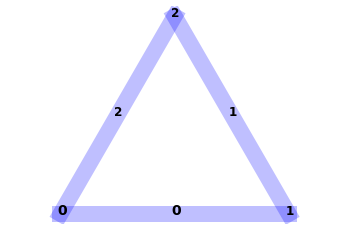

In [98]:
# triangle
%matplotlib inline
import numpy as np    
import matplotlib.pyplot as plt 

a = np.pi/3

plt.plot([0,2],[0,0],'b',linewidth=16,alpha=0.25)   # link 0
plt.text(0-.03,0,'0',fontsize=14, weight='bold')
plt.text(1-.03, 0,'0',fontsize=14, weight='bold')

plt.plot([2, 2*np.cos(a)],[0, 2*np.sin(a)],'b',linewidth=16,alpha=0.25)   # link 1
plt.text(2-.03,0,'1',fontsize=12, weight='bold')
plt.text(1+np.cos(a)-.03,np.sin(a),'1',fontsize=12, weight='bold')
          
plt.plot([2*np.cos(a),0],[2*np.sin(a),0],'b',linewidth=16,alpha=0.25)   # link 2
plt.text(2*np.cos(a)-.03,2*np.sin(a),'2',fontsize=12, weight='bold')
plt.text(np.cos(a)-.03,np.sin(a),'2',fontsize=12, weight='bold')

plt.axis('equal')
plt.axis('off');

\begin{myfig}\label{fig:triangle}. An equilateral triangle with labeled links and nodes. \end{myfig}

\begin{exercise}\label{ex:bignetexe} Generalize \fig\figref{ex3} to the case of 
16 nodes connected by 42 fibers by modifying  `skin.m`. 
Introduce one stiff (say $k=100$) fiber and show how to detect it
by properly choosing $f$. Submit your well-documented m-file as well
as the plots, similar to \fig\figref{skin}, from which you conclude the 
presence of a stiff fiber. 
\end{exercise}
<!--  This appears a little to hard/detailed and not really needed for further work (accept to justify LU)
\begin{exercise}\label{ex:fastnetexe} Generalize \fig\figref{ex3} to permit ever finer 
meshes. In particular, with reference to \fig\figref{finenet}
we assume $N(N-1)$ nodes where the horizontal and vertical fibers each 
have length $1/N$
while the diagonal fibers have length $\sqrt 2/N$. The top row of fibers is
anchored to the ceiling.



 (i) Write and test a \Matlab\ function  `S=bignet(N)` that accepts
the  **odd** number $N$ and produces the stiffness matrix $S=A^TKA$.
As a check on your work we offer a  `spy` plot of $A$ when $N=5$. 
Your $K$ matrix
should reflect the fiber lengths as spelled out in (\ref{eq:kj}). You may assume
$Y_ja_j=1$ for each fiber. The sparsity of $A$ also produces a sparse $S$.
In order to exploit this, please use  `S=sparse(S)` as the final line
in  `bignet.m`.

 (ii) Write and test a driver called  `bigrun` that generates
$S$ for $N=5:4:29$ and for each $N$ solves $Sx=f$ two ways for 100 choices of $f$.
In particular, $f$ is a steady downward pull on the bottom set of nodes, with
a continual increase on the pull at the center node. This can be done via
{\tt f=zeros(size(S,1),1);  f(2:2:2*N) = 1e-3/N; \hfil\break
for j=1:100,\hfil\break
\hskip .4in  f(N+1) = f(N+1) + 1e-4/N;\hfil\break}
This construction should be repeated twice, with the code that closes
\S\subsecref{fib} as your guide. In the first scenario,
precompute $S^{-1}$ via  `inv} and then apply $x=S^{-1}f$ in the {\tt j`
loop.
In the second scenario precompute $L$ and $U$ and then
apply $x=U\backslash(L\backslash f)$ in the  `j` loop. In both cases use
 `tic` and `toc` to time each for loop and so produce a graph
as in \fig\figref{bigrun}

\end{exercise}

\centerline{\psfig{figure=c2/finenet.eps,width=3.5in}}
\figlabel{finenet}
\centerline{\Fig\figref{finenet}. A fine anchored fiber network.}

\centerline{\psfig{figure=c2/spyA5.eps,width=3in} \hskip 0.25in
            \psfig{figure=c2/lu_vs_inv.eps,width=3in}}
\figlabel{bigrun}
\Fig\figref{bigrun}. (A) The nonzeros of the incidence matrix of the 
fine net of \fig\figref{finenet} with 5 levels.
(B) Comparison of solution times for large fine nets.
**Submit** your well documented code, 
a spy plot of $S$ when $N=9$, and
a time comparison like (will vary with memory and cpu) \fig\figref{bigrun}.
-->

\begin{exercise}\label{ex:f3d}
We consider the methane molecule of \fig\figref{methane}. The carbon atom
is at $(0,0,0)$ and hydrogen atoms are at

\begin{equation*}
  \eqalign{
  d &= (1,1,1) = (\sqrt 3\cos\theta_d\cos\phi_d,\sqrt 3\cos\theta_d\sin\phi_d,\sqrt 3\sin\theta_d) \cr
  c &=(-1,-1,1) = (\sqrt 3\cos\theta_c\cos\phi_c,\sqrt 3\cos\theta_c\sin\phi_c,\sqrt 3\sin\theta_c) \cr
  b &=(1,-1,-1) = (\sqrt 3\cos\theta_b\cos\phi_b,\sqrt 3\cos\theta_b\sin\phi_b,\sqrt 3\sin\theta_b) \cr
  a &=(-1,1,-1) = (\sqrt 3\cos\theta_a\cos\phi_a,\sqrt 3\cos\theta_a\sin\phi_a,\sqrt 3\sin\theta_a), \cr}
\end{equation*}

where the angles are as illustrated in \fig\figref{methane}.
We can use (\ref{eq:cauchyexact}) to compute their cosines. For example,
with reference to \fig\figref{methane}(B),
as $d=(1,1,1)$ and $Pd=(1,1,0)$ and the dashed red vector is $e_1=(1,0,0)$
we find

\begin{equation*}
  \cos(\theta_d) = \frac{d^TPd}{\|d\|\|Pd\|} = \frac{2}{\sqrt 3\sqrt 2}.
   \and
  \cos(\phi_d) = \frac{e_1^TPd}{\|e_1\|\|Pd\|} = \frac{1}{\sqrt 2}.
\end{equation*}

The respective sines are then completed by Pythagoras.
Following this reasoning please derive

\begin{equation*}
  \eqalign{
  \cos\phi_d &= \sin\phi_d = 1/\sqrt 2, \hskip 0.25in \sin\theta_d = 1/\sqrt 3, 
  \hskip 0.25in \cos\theta_d = \sqrt{2/3}  \cr
  \cos\phi_c &= \sin\phi_c = -1/\sqrt 2, \hskip 0.25in \sin\theta_c = 1/\sqrt 3, 
  \hskip 0.25in \cos\theta_c = \sqrt{2/3}  \cr
  \cos\phi_b &= -\sin\phi_b = 1/\sqrt 2, \hskip 0.25in \sin\theta_b = -1/\sqrt 3, 
  \hskip 0.25in\cos\theta_b = \sqrt{2/3}  \cr
  -\cos\phi_a &= \sin\phi_a = 1/\sqrt 2, \hskip 0.25in \sin\theta_a = -1/\sqrt 3, 
   \hskip 0.25in\cos\theta_a = \sqrt{2/3}.  \cr}
\end{equation*}

If the displacement of the carbon atom is $(x_1,x_2,x_3)$ and the displacement
of the $d$ hydrogen atom is $(x_4,x_5,x_6)$ the elongation of the 
respective CH bond is

\begin{equation*}
  e_d = (x_4-x_1)\cos\theta_d\cos\phi_d + (x_5-x_2)\cos\theta_d\sin\phi_d + (x_6-x_3)\sin\theta_d.
\end{equation*}

Apply this reasoning to find the elongation of the other bonds and so arrive
at the following 4-by-15 incidence matrix
\setcounter{MaxMatrixCols}{20}

\begin{equation}
  A = \frac{1}{\sqrt 3}\begin{pmatrix}
  1 & -1 & 1 & -1 & 1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
  -1 & 1 & 1 & 0 & 0 & 0 & 1 & -1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
  1 & 1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & 1 & 0 & 0 & 0 \\
  -1 & -1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 \end{pmatrix}
    \label{eq:methA}
\end{equation}

\end{exercise}

<IPython.core.display.Javascript object>


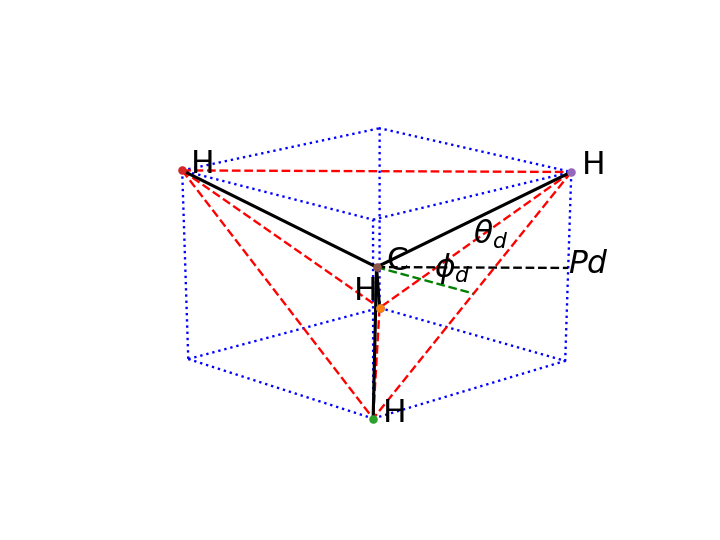

In [2]:
# methane, click molecule to pan

%matplotlib notebook
import numpy as np    
import matplotlib.pyplot as plt 

fig = plt.figure()
ax = plt.axes(projection="3d")

# draw containing cube
ax.plot3D([-1, 1, 1, -1, -1],[-1, -1, -1, -1, -1],[-1, -1, 1, 1, -1],'b:')
ax.plot3D([-1, 1, 1, -1, -1],[1, 1, 1, 1, 1],[-1, -1, 1, 1, -1],'b:')
ax.plot3D([1, 1],[-1, 1],[1, 1],'b:')
ax.plot3D([1, 1],[-1, 1],[-1, -1],'b:')
ax.plot3D([-1, -1],[-1, 1],[1, 1],'b:')
ax.plot3D([-1, -1],[-1, 1],[-1, -1],'b:')

# tet
ax.plot3D([-1, 1],[-1, 1],[1, 1],'r--')
ax.plot3D([-1, 1],[1, -1],[-1, -1],'r--')
ax.plot3D([1, -1],[1, 1],[1, -1],'r--')
ax.plot3D([-1, -1],[-1, 1],[1, -1],'r--')
ax.plot3D([1, 1],[1, -1],[1, -1],'r--')
ax.plot3D([-1, 1],[-1, -1],[1, -1],'r--')
ax.text3D(-1.3,1,-1,'H',fontsize=20)
ax.scatter3D(-1,1,-1,'k.')
#ax.text3D(-4-1,1,-1,'H',fontsize=24)
ax.plot3D([0, -1],[0, 1],[0, -1],'k',linewidth=2)
ax.scatter3D(-1,1,-1,'k.')
ax.plot3D([0, 1],[0, -1],[0, -1],'k',linewidth=2)
ax.scatter3D(1,-1,-1,'k.')
ax.plot3D([0, -1],[0, -1],[0, 1],'k',linewidth=2)
ax.scatter3D(-1,-1,1,'k.')
ax.plot3D([0, 1],[0, 1],[0, 1],'k',linewidth=2)
ax.scatter3D(1,1,1,'k.')
ax.text3D(1.1,-1,-1,'H',fontsize=20)
#ax.text3D(-4+1,-1,-1,'H',fontsize=24)
ax.text3D(-.9,-1,1,'H',fontsize=20)
#ax.text3D(-4-1,-1,1,'H',fontsize=24)
ax.text3D(1.1,1,1,'H',fontsize=20)
#ax.text3D(-4+1,1,1,'H',fontsize=24)
ax.text3D(.1,0,0,'C',fontsize=20)
ax.scatter3D(0,0,0,'k.')

ax.plot3D([0, 1],[0, 0],[0, 0],'g--')
ax.plot3D([0, 1],[0, 1],[0, 0],'k--')
ax.text3D(.4,.2,-.05,'$\\phi_d$',fontsize=20)
ax.text3D(1,1,-.05,'$Pd$',fontsize=20)
ax.text3D(.5,.5,.25,'$\\theta_d$',fontsize=20)

ax.axis('off');

\begin{myfig}\label{fig:methane}
(A) A methane, CH$_4$, molecule. The 4 hydrogen atoms
sit at the vertices of the red tetrahedron. In order to establish
coordinates we have inscribed the tetrahedron in a blue box.
(B) An illustration of the two angles needed to describe the hydrogen atom
at point $d=(1,1,1)$. The red dashed line is the positive $x$-axis.
The dashed black line is the projection of $d$ onto the $(x,y)$ plane.
The angle $\phi_d$ is the angle between these dashed lines.
The angle $\theta_d$ is the angle between the dashed black line
and the $d$ vector. (C) Labeling the three degrees of freedom of each atom. \end{myfig}

<IPython.core.display.Javascript object>


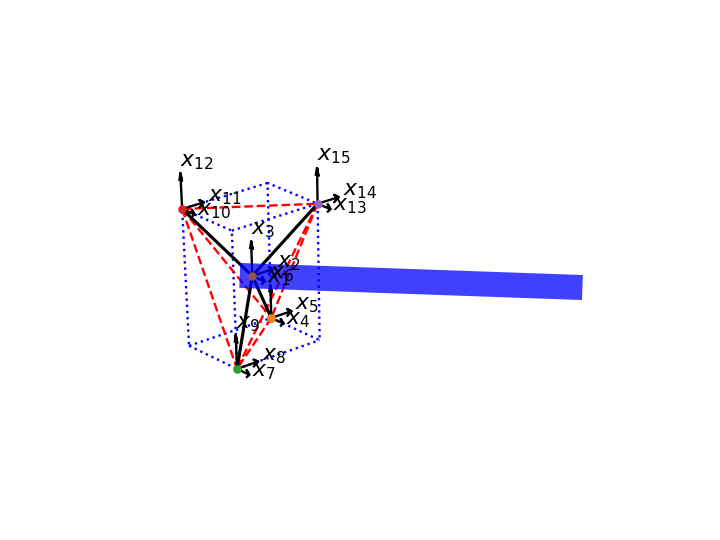

In [3]:
# methane with x, click on molecule to pan
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection="3d")

a = [-1, 1, -1];
b = [1, -1, -1];
c = [-1, -1, 1];
d = [1, 1, 1];

# cube frame
ax.plot3D([-1, 1, 1, -1, -1],[-1, -1, -1, -1, -1],[-1, -1, 1, 1, -1],'b:')
ax.plot3D([-1, 1, 1, -1, -1],[1, 1, 1, 1, 1],[-1, -1, 1, 1, -1],'b:')
ax.plot3D([1, 1],[-1, 1],[1, 1],'b:')
ax.plot3D([1, 1],[-1, 1],[-1, -1],'b:')
ax.plot3D([-1, -1],[-1, 1],[1, 1],'b:')
ax.plot3D([-1, -1],[-1, 1],[-1, -1],'b:')

# tet
ax.plot3D([-1, 1],[-1, 1],[1, 1],'r--')
ax.plot3D([-1, 1],[1, -1],[-1, -1],'r--')
ax.plot3D([1, -1],[1, 1],[1, -1],'r--')
ax.plot3D([-1, -1],[-1, 1],[1, -1],'r--')
ax.plot3D([1, 1],[1, -1],[1, -1],'r--')
ax.plot3D([-1, 1],[-1, -1],[1, -1],'r--')
#ax.text3D(-1.3,1,-1,'H',fontsize=20)
ax.scatter3D(-1,1,-1,'k.')
#ax.text3D(-4-1,1,-1,'H',fontsize=24)
ax.plot3D([0, -1],[0, 1],[0, -1],'k',linewidth=2)
ax.scatter3D(-1,1,-1,'k.')
ax.plot3D([0, 1],[0, -1],[0, -1],'k',linewidth=2)
ax.scatter3D(1,-1,-1,'k.')
ax.plot3D([0, -1],[0, -1],[0, 1],'k',linewidth=2)
ax.scatter3D(-1,-1,1,'k.')
ax.plot3D([0, 1],[0, 1],[0, 1],'k',linewidth=2)
ax.scatter3D(1,1,1,'k.')

a1x = np.array([0, .5, .4, .5, .4])
a1z = np.array([0, 0, .1, 0, -.1])/2
a1y = np.zeros(5,)
a2y = np.array([0, .5, .4, .5, .4])
a2z = np.array([0, 0, .1, 0, -.1])/2
a2x = np.zeros(5,)
a3z = np.array([0, .5, .4, .5, .4])
a3x = np.array([0, 0, .1, 0, -.1])/2
a3y = np.zeros(5,)

ax.plot3D(a1x,a1y,a1z,'k')
ax.plot3D(a2x,a2y,a2z,'k')
ax.plot3D(a3x,a3y,a3z,'k')
ax.text3D(.6,0,0,'$x_1$',fontsize=14)
ax.text3D(0,.6,0,'$x_2$',fontsize=14)
ax.text3D(0,0,.6,'$x_3$',fontsize=14)

ax.plot3D(a[0]+a1x,a[1]+a1y,a[2]+a1z,'k')
ax.plot3D(a[0]+a2x,a[1]+a2y,a[2]+a2z,'k')
ax.plot3D(a[0]+a3x,a[1]+a3y,a[2]+a3z,'k')
ax.text3D(a[0]+.6,a[1],a[2],'$x_4$',fontsize=14)
ax.text3D(a[0],a[1]+.6,a[2],'$x_5$',fontsize=14)
ax.text3D(a[0],a[1],a[2]+.6,'$x_6$',fontsize=14)

ax.plot3D(b[0]+a1x,b[1]+a1y,b[2]+a1z,'k')
ax.plot3D(b[0]+a2x,b[1]+a2y,b[2]+a2z,'k')
ax.plot3D(b[0]+a3x,b[1]+a3y,b[2]+a3z,'k')
ax.text3D(b[0]+.6,b[1],b[2],'$x_7$',fontsize=14)
ax.text3D(b[0],b[1]+.6,b[2],'$x_8$',fontsize=14)
ax.text3D(b[0],b[1],b[2]+.6,'$x_9$',fontsize=14)

ax.plot3D(c[0]+a1x,c[1]+a1y,c[2]+a1z,'k')
ax.plot3D(c[0]+a2x,c[1]+a2y,c[2]+a2z,'k')
ax.plot3D(c[0]+a3x,c[1]+a3y,c[2]+a3z,'k')
ax.text3D(c[0]+.6,c[1],c[2],'$x_{10}$',fontsize=14)
ax.text3D(c[0],c[1]+.6,c[2],'$x_{11}$',fontsize=14)
ax.text3D(c[0],c[1],c[2]+.6,'$x_{12}$',fontsize=14)

ax.plot3D(d[0]+a1x,d[1]+a1y,d[2]+a1z,'k')
ax.plot3D(d[0]+a2x,d[1]+a2y,d[2]+a2z,'k')
ax.plot3D(d[0]+a3x,d[1]+a3y,d[2]+a3z,'k')
ax.text3D(d[0]+.6,d[1],d[2],'$x_{13}$',fontsize=14)
ax.text3D(d[0],d[1]+.6,d[2],'$x_{14}$',fontsize=14)
ax.text3D(d[0],d[1],d[2]+.6,'$x_{15}$',fontsize=14)

ax.scatter3D(0,0,0,'k.')

ax.axis('off');


## Equilibrium and Energy Minimization* 

Given a stable mechanical system with stiffness 
matrix $S=A^TKA\in\maR^{n\times n}$ and
a load vector $f\in\maR^n$ we rate  **candidates** $u\in\maR^n$ for its
displacement based on their associated total potential energy. Where

\begin{equation*}
  \eqalign{\hbox{Total Potential Energy}
  &\equiv \hbox{Internal Strain Energy} - \hbox{Work Done by Load} \cr
  &= \hf u^TSu - u^Tf. \cr} \nonumber
\end{equation*}

The resulting minimum principle hinges on two key properties of $S=A^TKA$,
inherited from the physical fact that $K$ is a diagonal matrix with positive 
numbers on its diagonal.
The first is that it is symmetric, for $S^T=(A^TKA)^T=A^TK^TA=S$, and the
second is that it is  **positive definite**

\begin{equation}
  v^TSv = v^TA^TKAv = (Av)^TK(Av) = \sum_{j=1}^n k_j(Av)_j^2 > 0,
   \hskip 0.25in\forall\,v\in\maR^n, \quad v\ne 0. \label{eq:posdef}
\end{equation}

The inequality stems from the fact that each stiffness, $k_j>0$, and as $A$ is stable
that $Av\ne 0$.
This also helps us see why $\hf v^TSv$ is identified as the Internal Strain
Energy. For if $v$ is the candidate displacement then $e=Av$ is the associated
elongation, or  **strain**. The associated internal force is $y=Ke$ and hence 
$k_j(Av)_j^2/2 = e_jy_j/2$ is strain energy stored in the $j$th fiber.


\begin{proposition}\label{prop:minpot} The candidate with the least
total potential energy is precisely the equilibrium solution $x=S^{-1}f$. 
In other words

\begin{equation}
  -\hf f^TS^{-1}f = \min_{u\in\maR^n}  \hf u^TSu - u^Tf. \label{eq:mtpe}
\end{equation}
\end{proposition}

**Proof:** Suppose that $Sx=f$. Now for each $u\in\maR^n$,

\begin{equation}
  \eqalign{(\hf u^TSu - u^Tf)-(\hf x^TSx - x^Tf) 
   &= \hf x^TSx - u^TSx + \hf u^TSu \cr
   &= \hf (x-u)^TS(x-u) \ge 0, \cr} \label{eq:mtpeineq}
\end{equation}

where the last equality uses $S=S^T$ and the last inequality uses (\ref{eq:posdef}).
It follows directly from (\ref{eq:mtpeineq}) that $x=S^{-1}f$ indeed minimizes 
the total potential energy. On substitution of this $x$ into 

\begin{equation*}
  \hf x^TSx - x^Tf
\end{equation*}

we arrive at the left side of (\ref{eq:mtpe}).  **End of proof.**

Let's illustrate this result on the simple tent below.

In [ ]:
# draw a tent
%matplotlib inline

ax = np.array([0, 1, .75, 1, .75])
ay = np.array([0, 0, .15, 0, -.15])

plt.figure()
plt.fill([-1, 6, 6, -1],[0, 0, -1, -1],'b')
plt.plot([0, 2.5],[0, 2.5],'k.-',linewidth=2,markersize=16)
plt.text(0.3,1,'$k_0$',fontsize=16)

plt.plot([2.5, 5],[2.5, 0],'k.-',linewidth=2,markersize=16)
plt.text(4.3,1,'$k_1$',fontsize=16)

plt.plot(ax+2.5,ay+2.5,'k',linewidth=1); 
plt.plot(ay+2.5,ax+2.5,'k',linewidth=1)
plt.text(3.5,2.5,'$f_0$',fontsize=16)
plt.text(2.5,3.5,'$f_1$',fontsize=16)

plt.text(0.75,0.25,'$\pi/4$',fontsize=16)
plt.text(5.25,0.25,'$3\pi/4$',fontsize=16)

plt.axis('equal')
plt.axis('off');

\begin{myfig}\label{fig:tent}. A symmetric tent, fiber 0 at angle $\pi/4$ and fiber 1 at angle $3\pi/4$. \end{myfig}

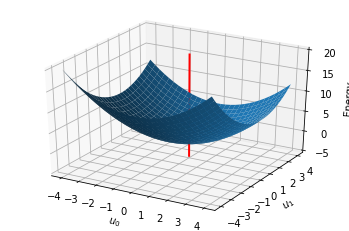

In [101]:
# Draw a tent and its total potention energy surface
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

nx, ny = (30, 30)
x = np.linspace(-4, 4, nx)
y = np.linspace(-4, 4, ny)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X,Y,(X**2+Y**2)/2 - Y)
ax.plot3D([0, 0],[1,1],[-5, 20],'r',linewidth=2)
ax.set_zlim([-5,20])
ax.set_xlabel('$u_0$')
ax.set_ylabel('$u_1$')
ax.set_zlabel('Energy');

Figure {TPEt}. The total potential energy of the tent in figure {tent} assuming uniform stiffness, $k_0=k_1=1$, and a vertical pull, $f_0=1$ and $f_1=1$. We have placed a vertical red line through the equilibrium solution, $x=[0,1]$, and note that it indeed produces the smallest total potential energy.

<!-- a bit of a stretch
In addition to confirming our belief that equilibrium solutions should use less
energy than other candidates, this principle can also be used to estimate important
physical quantities  *without ever having to solve* $Sx=f$ . To see this,
note from (\ref{eq:mtpeineq}) that, $x^Tf$, the actual work done by the load,
obeys

\begin{equation}
   x^Tf = x^TSx \ge 2 u^Tf - u^TSu \hskip 0.25in\forall\,u\in\maR^n. \label{eq:LBcomp}
\end{equation}

The key point is that we are free to try  *any*  candidate on the right hand side.
Each choice will provide a lower bound on the true work done. There are trivial
choices, e.g., $u=0$ informs is that $x^Tf\ge 0$, and nontrivial choices, e.g.,
$u=f$ informs us that

\begin{equation*}
  x^Tf \ge f^T(2I - A^TKA)f. \nonumber
\end{equation*}

This inequality, in the context of our small example, (\ref{eq:Kxb}), yields

\begin{equation*}
  x^Tf \ge \begin{pmatrix} f_1 & f_2 & f_3 \end{pmatrix}
  \begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{pmatrix}
  \begin{pmatrix} f_1 \\ f_2 \\ f_3 \end{pmatrix} =
  \begin{pmatrix} f_1 & f_2 & f_3 \end{pmatrix}
  \begin{pmatrix} f_2 \\ f_1+f_3 \\ f_2 \end{pmatrix} =
  2f_2(f_1 + f_3). \nonumber
\end{equation*}

In the constant load case, $f_1=f_2=f_3$, this reveals that the total
displacement, $x_1+x_2+x_3$, exceeds $4f_1$.
-->

Although developed (here) as a principle of mechanics this proposition
has found use in many areas of physical equilibrium. We will also have occasion
to invoke it as an analytical tool. 
Toward that end it seems best to formulate it in a general setting - and in 
a way too that removes the perhaps annoying $-1/2$ factor
on the left side of (\ref{eq:mtpe}).


\begin{proposition}\label{prop:maxpot} If $B\in\maR^{n\times n}$ is symmetric 
and positive definite and $f\in\maR^n$ then

\begin{equation*}
  f^TB^{-1}f = \max_{x\in\maR^n} 2x^Tf - x^TBx, \nonumber
\end{equation*}

and the maximum is attained at that $x$ for which $Bx=f$.
\end{proposition}

**Proof:** This is a simple rearrangement of (\ref{eq:mtpe}). In particular,
note that 

\begin{equation*} 
  \max_{x\in\maR^n} \{2x^Tf - x^TBx\} = \max_{x\in\maR^n}\{-2(\hf x^TBx - x^Tf)\} 
   = -2\min_{x\in\maR^n} \{\hf x^TBx - x^Tf\}. \nonumber
\end{equation*} 

**End of proof.**

\begin{exercise}\label{ex:compliance} The minimum energy principal of \S\subsecref{minprin}
provides a means to define, and study, a scalar measure of network strength or,
rather, weakness. Namely, given a load $f$ and associated displacement $x$
we define the  **compliance** of the network to be simply
$x^Tf$, i.e., the work done by the load. In designing networks we naturally
choose fiber stiffnesses to lessen the compliance, i.e., to strengthen the
network. Toward that end, for fixed incidence matrix $A$ and load $f$ we
denote by $C(k)$ the compliance of the network with stiffnesses 
$k=(k_1,\ldots,k_m)$.

(a) Use Prop. \ref{prop:maxpot} to show that
 
\begin{equation*}
  C(k) = \max_{v\in\maR^n}\ 2v^Tf - v^TA^TKAv.
\end{equation*}

(b) Use (a) to show that if $\kappa=(\kappa_1,\ldots,\kappa_m)$ is
a stiffness vector for which $\kappa_j\ge k_j$ for each $j$ then 
$C(\kappa)\le C(k)$. That is, stiffening each of the fibers lessens the
work done by the load. Hint: (\ref{eq:posdef}).

(c) Show that the compliance is a  **convex function** 
\index{convex function} of $k$. That is, show that

\begin{equation}
  C(tk+(1-t)\kappa) \le tC(k) + (1-t)C(\kappa)  \label{eq:compconvex}
\end{equation}

for all $0\le t\le 1$ and all $k$ and $\kappa$. Hint: First show that the
max of a sum can not exceed the sum of the max's. That is,

\begin{equation*}
  \max_v\,(\alpha(v)+\beta(v)) \le \max_v\,\alpha(v) + \max_u\,\beta(u).
\end{equation*}

 (d) Show that if $\|f\|=1$ and $A^TKAf=\la f$ for some $\la\in\maR$
then $C(k)\ge 1/\la$. Hint: Choose $u=\alpha f$ and maximize over 
$\alpha\in\maR$.
\end{exercise}